<a href="https://colab.research.google.com/github/hurairakhan135/COSC3P99/blob/main/COSC_3P99_Notebook1_Huraira_Khan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NoteBook By: Huraira Khan #7517824

# What is a Graph?


A graph ($G=(V,E)$) consists of nodes ($V$) and edges ($E$) connecting these nodes.

### How do we represent graphs?

An adjacency matrix offers a structured representation of graphs, where each node corresponds to both a row and column index. Entries in the matrix indicate the presence or absence of edges between nodes, typically represented as 1s and 0s.

Graphs can either be symmetric, lacking directed edges, example:

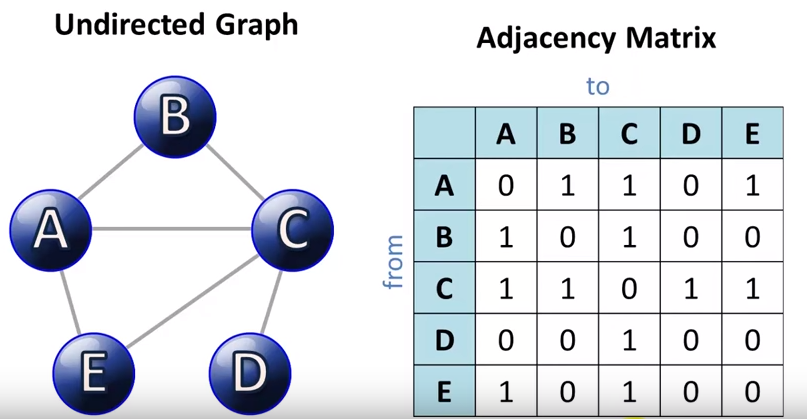
*(Anirdth, 2016)*

or asymmetric, containing directed edges, example:

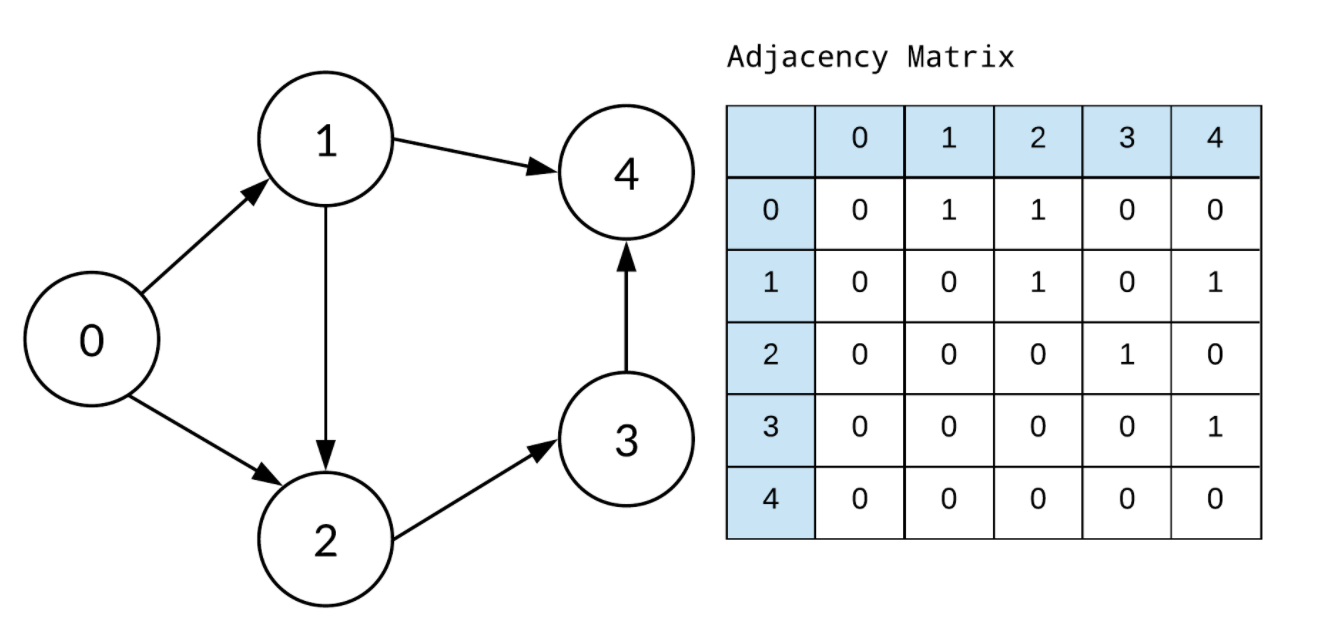

Symmetric graphs have adjacency matrices that are symmetrical across the diagonal, while asymmetric ones do not.

Edges in graphs can also be weighted, where matrix entries represent numerical values instead of just binary connections.

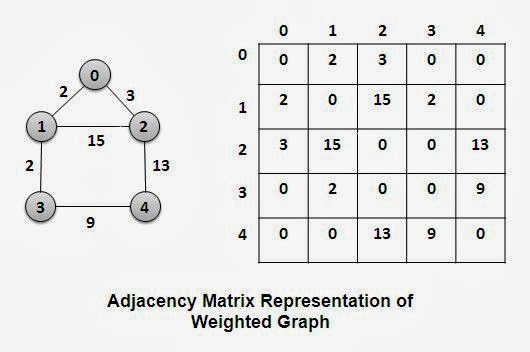
Computer representation of graphs. Graphs and Trees. (n.d.-a). https://www.cs.mtsu.edu/~xyang/3080/adjacencyMatrix.html

## Feature Information
**Node-Level Attributes:** Graphs frequently include attributes or features specific to nodes. In heterogeneous graphs, different types of nodes may possess unique attribute representations tailored to their respective types. Such as age, hair colour, grade, height, nationalilty.

**Edge Features:** In certain graphs, edges are accompanied by real-valued features alongside discrete edge types. This enriches the graph representation by providing additional continuous information about the relationships between nodes.

## Node Classification

In node classification, the goal is to predict the category, type, or attribute of nodes within a graph based on a training set where some nodes are labeled. Typically, this labeling is applied to a small subset of nodes, but it can extend to many labeled nodes or even generalize across disconnected graphs.

Nodes within a graph are not independent and identically distributed. Instead, the classification leverages the interconnections between nodes, utilizing the graph structure to infer and propagate labels across the network. This approach capitalizes on the relationships and dependencies between nodes to enhance classification accuracy and generalize predictions beyond individual nodes.

## Supervised or Semi-supervised?

In semi-supervised learning for graph-based classification, we leverage both labeled and unlabeled nodes within the graph during training. While labeled nodes provide direct supervision, the model utilizes the graph's structure to propagate and infer labels for unlabeled nodes based on their relationships with labeled nodes. This approach improves the model's performance by effectively utilizing information from both labeled and unlabeled parts of the graph, distinguishing it from fully supervised learning where all training data points are labeled and directly observed during training.

# What are Graph Neural Networks and Why study them?

There are many reasons why the study on graphs are benificial, such as transportaion networks and social networks.
GNNs are being used to discover more effective medicines like antibittics
Estimated Travel Times on Google Maps are done by GNNs. As well as social media algorithms

GNNs have helped mathmaticians uncover the hidden structure of mathematical objects.

Imagine a social network where nodes represent people and edges represent friendships. A GNN can be used to predict a person's interests based on their friends' interests by iteratively updating each node's features based on the features of its neighbors. This allows the model to capture both the node's own information and the structure of the graph around it.

  To present data to a machine learning model, we use a **node feature matrix** where we *attach each node to a feature vector*.

  We represent a set of Edges by using an adjacency matrix

  Rules a GNN must satisfy:
$$f (PX, PAP>) = f (X, A) (Invariance)$$
$$F(PX, PAP>) = PF(X, A) (Equivariance)$$



## Graph Neural Networks (GNN) Frameworks:

GNNs can be categorized into three primary types based on their update functions: convolutional, attentional, and message-passing. Each type uses different mechanisms for aggregating and updating node features.

  **Representative Models: Key models for each type include**
    - **Convolutional GNNs:** Chebyshev, GCN, and SGC (simplified graph convolution)
    - **Attentional GNNs:** MoNet(the mixture model CNN), GAT (Graph Attention Network), and GATv2
    - **Message-Passing GNNs.** IN (Interaction Networks), MPNN (Message Passing Neural Networks), and GN (Graph Networks)
  
  **Principal Tasks:** GNNs can be applied to various tasks such as node classification (e.g., predicting protein functions), graph classification (e.g., predicting molecular properties), and link prediction (e.g., predicting drug-target interactions).

  **Expressive Power:** The expressive power of GNNs increases from convolutional to attentional to message-passing models, but this comes with trade-offs in interpretability, scalability, and learning stability.

  **Limitations and Universality:** While GNNs using message-passing can theoretically simulate any computation with appropriate modifications, they may still face fundamental limitations. Nonetheless, with sufficient depth, width, and proper initial features, they are considered Turing universal.





  (Veličković, 2019)

## Graph Convolutional Networks (GCNs)

GCNs are neural networks designed to work with graph-structured data. They apply convolutional operations over graphs, which allows them to capture local graph structure and propagate information through the network. Simply put, GCNs can be understood as a message passing algorithm, which passes an entire vecter of input data. So when detecting for example credit card fraud detection, it would tell it's neibours, the details of where this card is from and other associated information about it (From, IP Address, Billing address. etc)
This is particularly useful for tasks like node classification, link prediction, and graph clustering. (WelcomeAIOverlords, 2020)

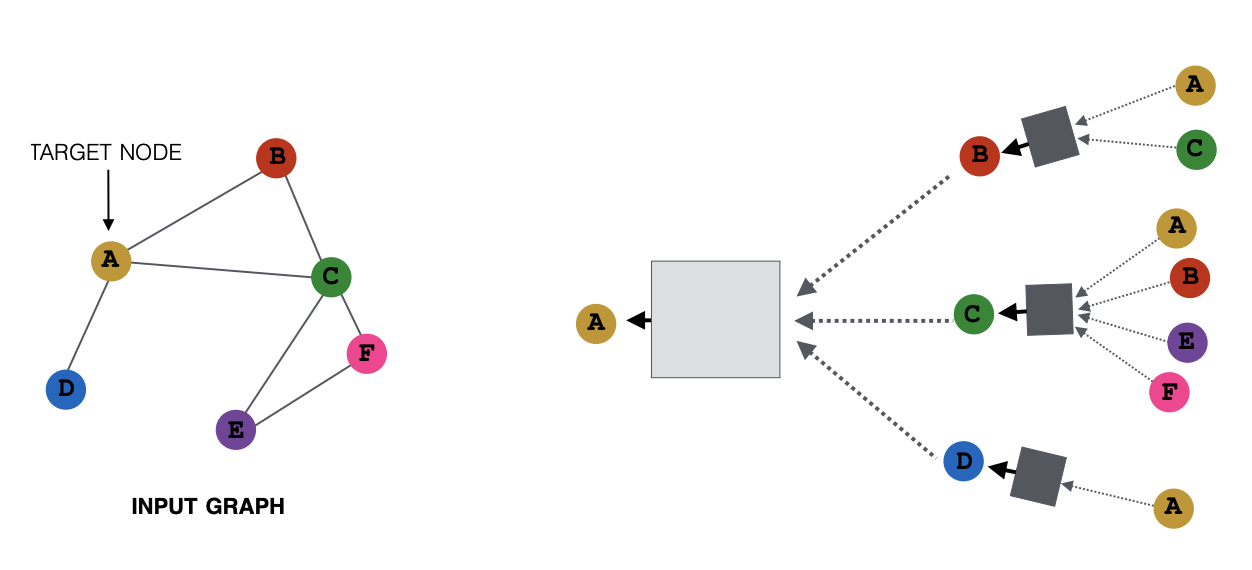
(Hugh, 2022).

## How does a simple calculation of a GCN work?

1. For any node in the graph, first get all of the attribute vectors of it's connected nodes, and apply some aggregation function, like and average. Aggregation makes sure that the representaion is the same size regardless of the number of neighbours
2. Pass this average vector through a dense neural network layer(bassically multiplying it by some matrix) and apply an activation function like ReLU. The output of this dense layer is the new vector representaion of the node.

So now a node is the average of it's negihbours passed through some nonlinear function.

## Label Propagation

Label propagation is an iterative algorithm used for semi-supervised learning in graphs, where the labels of a small set of nodes are propagated to the rest of the network based on the connections between nodes (good signals or bad signals). Comparing this to GCNs, this passes messages of only the known label values. Using the same credit card example, the Label Propagation Algorithm can spread these labels across the entire network, identifying communities by grouping connected individuals with the same label. (WelcomeAIOverlords, 2020)

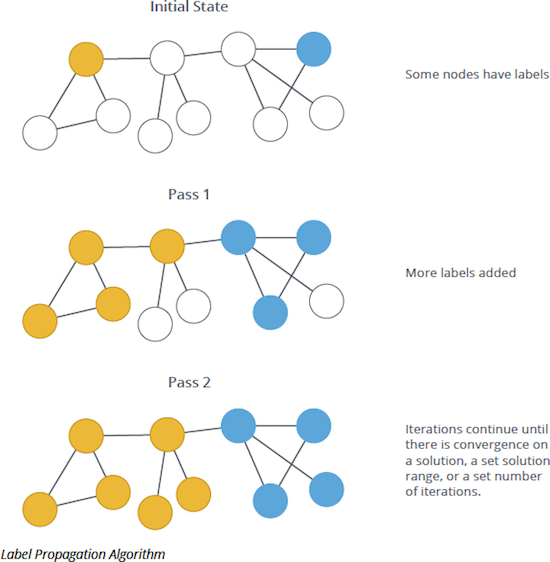
(Hoppa, 2019,).

# Example Implementions of GCN Node Classificaions

## Setup

In [ ]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

#!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
#!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
#!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git


!pip install torch_geometric
#!pip install torch_scatter torch_sparse

# Helper function for visualization.
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt


def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()


def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

2.3.1+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.4 MB/s eta 0:00:00


# Karate Club

Lets look at some of this datasets properties

In [ ]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


| Dataset  | # of Graphs  | # of Features  | # of Classes  |
|---|---|---|---|
| Karate Club  | 34  | 156   | 4  |

The code retrieves the first graph from a dataset and prints out various statistics and properties such as:

- Total number of nodes and edges
- Average node degree
- Number and proportion of training nodes
- Presence of isolated nodes and self-loops
- Whether the graph is undirected

In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Has isolated nodes: False
Has self-loops: False
Is undirected: True


| Dataset  | # of Nodes  | # of Edges  |  Average node degree | Number of training nodes|
|---|---|---|---|---|
| Karate Club  | 34  | 156   | 4.59  | 4|

Each graph in PyTorch Geometric is represented by a single Data object, which holds all the information to describe its graph representation.

## GCN 2 + relu

In this we create a two layer GCN with a linear classifier. The Forward method is how the input data flows through our model

we now create a GCN

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4) # First graph convolutional layer, takes input features of size of the data set and outputs 4 features per node
        self.conv2 = GCNConv(4, 2) # Second graph convolutional layer takes input features of size 4 and outputs 2 features per node
        self.classifier = Linear(2, dataset.num_classes) # creates a linear transformation that takes in input features of size 2 and outputs of the size of the data classses

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index) # uses the edge index to know how to aggregate the features (x) from neighbouring nodes for each node.
        h = h.relu()
        h = self.conv2(h, edge_index)
        h = h.relu()

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


## New Karate Club Embedding Network Visualization

Here we will see how our embeddings look that was created

Embedding shape: [34, 2]


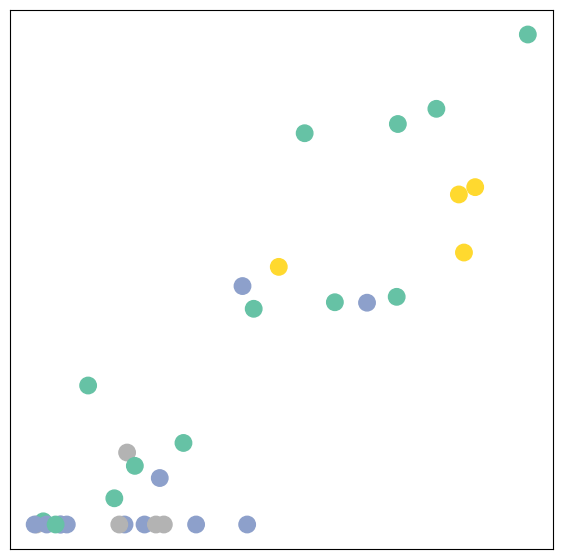

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.y)

## Training and Testing on the new Karate Club Network

Here we start to train the model.

We start this by going through two steps, training loop and a testing loop

We first start by defining what it means to be right or wrong in predictions which is by defining a loss criterion
*   **Loss criterion** is a metric that quantifies the difference between the predicted output of a model and the actual target values. It serves as a guide for training the model by measuring how well the model's predictions align with the expected results. (Opidi,2024)



* The Loss criterion we will use here is the [`CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) function.
 * **Cross Entropy** Loss calculates the difference between the true label and the predicted label probabilities. The function is versatile, supporting options for class weighting and ignoring specific target classes.

We will also need to use an **optimizer** for this
* An optimizer in machine learning is an algorithm that adjusts the parameters of a model to minimize the loss function, helping the model learn from the data. It determines how the model's weights should be updated based on the gradients calculated during backpropagation.
* The optimizer we will be using is [`Adam`](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam)




<IPython.core.display.Javascript object>

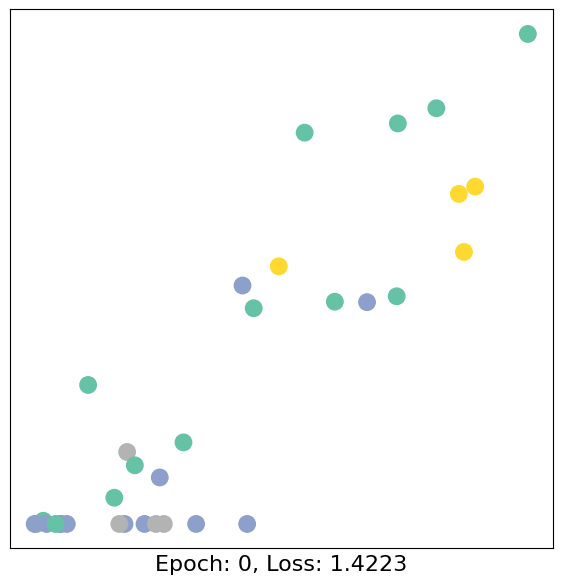

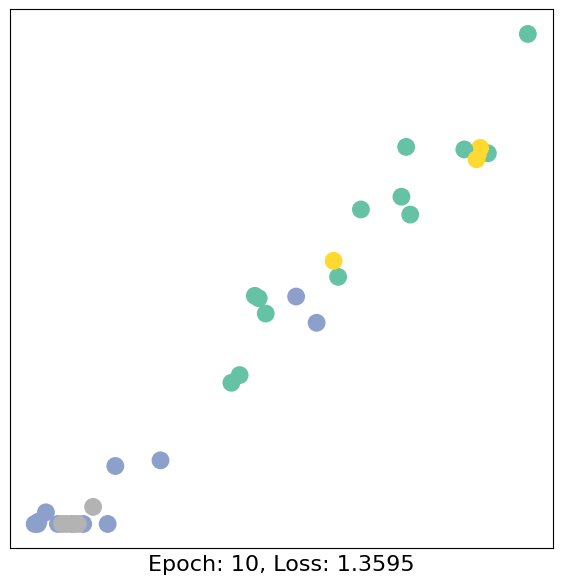

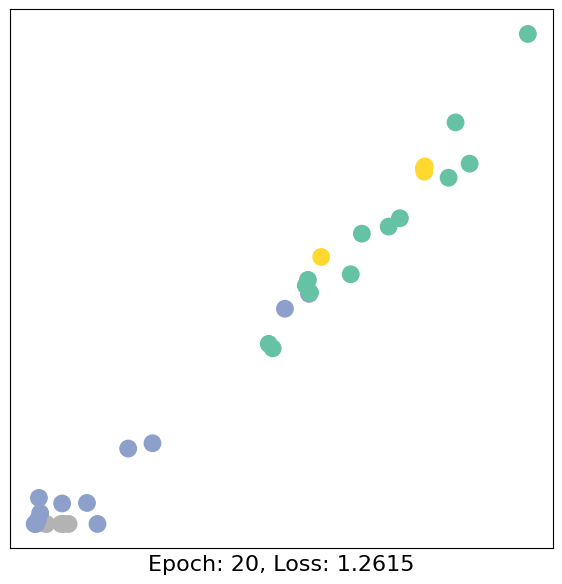

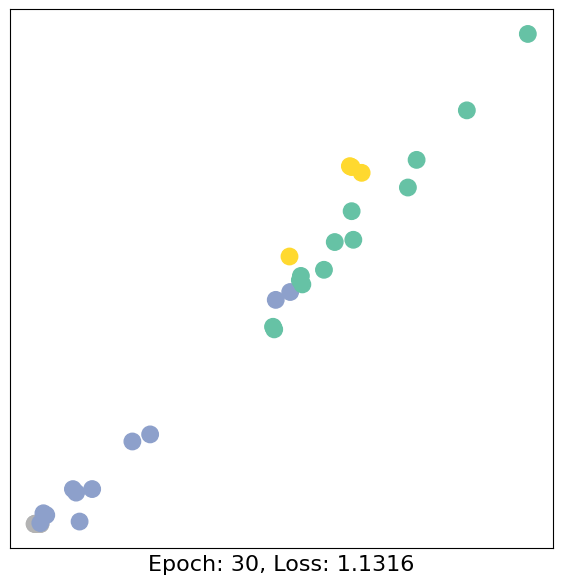

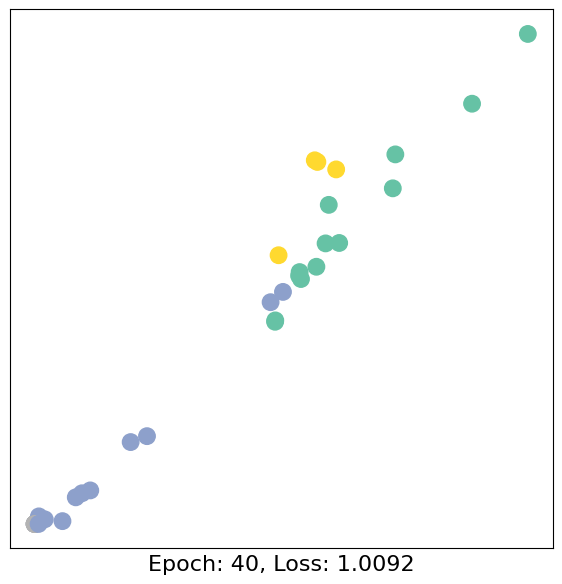

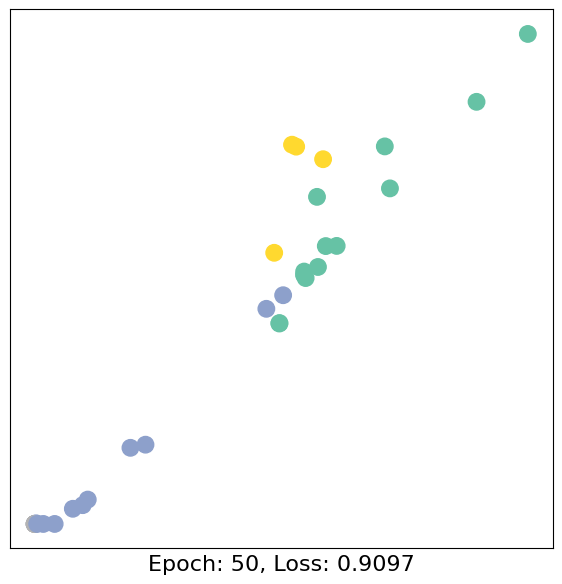

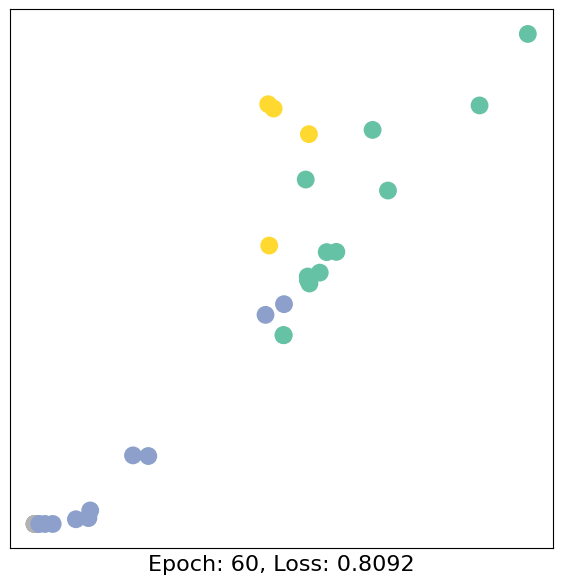

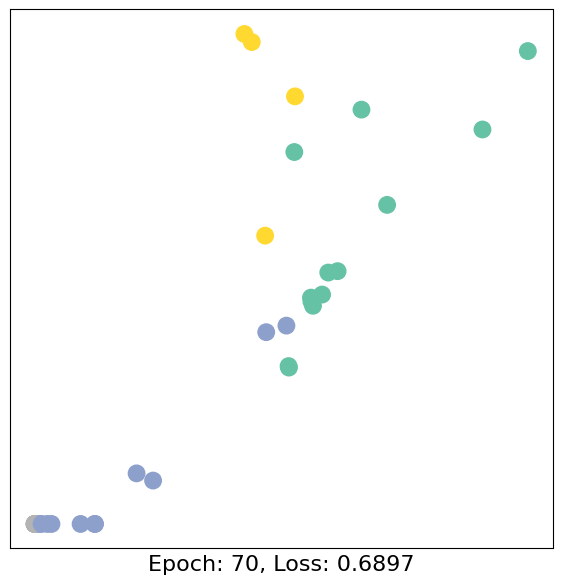

KeyboardInterrupt: 

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion. (explain entropy loss)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes. (Page 5 info)
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

@torch.no_grad() # disable gradient calculation
def test(data):
    model.eval() # Model is now in evaluation mode
    log_probs, h = model(data.x, data.edge_index) # Perform a single forward pass.
    accs = []
    for _, mask in data('train_mask', 'test_mask'): # iterate over the train and test masks
        pred = log_probs[mask].max(1)[1] # get the predicted labels
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item() # calculate the accuracy
        accs.append(acc)
    return accs


for epoch in range(401):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

test(data)

What are Epochs? Epochs refer to one complete cycle throught the entre training dataset

# Cora

In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid("", "Cora")
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Processing...
Done!


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7


| Dataset  | # of Graphs  | # of Features  | # of Classes  |
|---|---|---|---|
| Cora  | 1  | 1433   | 7  |

The code retrieves the first graph from a dataset and prints out various statistics and properties such as:

- Total number of nodes and edges
- Average node degree
- Number and proportion of training nodes
- Presence of isolated nodes and self-loops
- Whether the graph is undirected

In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True


| Dataset  | # of Nodes  | # of Edges  |  Average node degree | Number of training nodes|
|---|---|---|---|---|
| Cora  | 2708  | 10556   | 3.90  | 140|

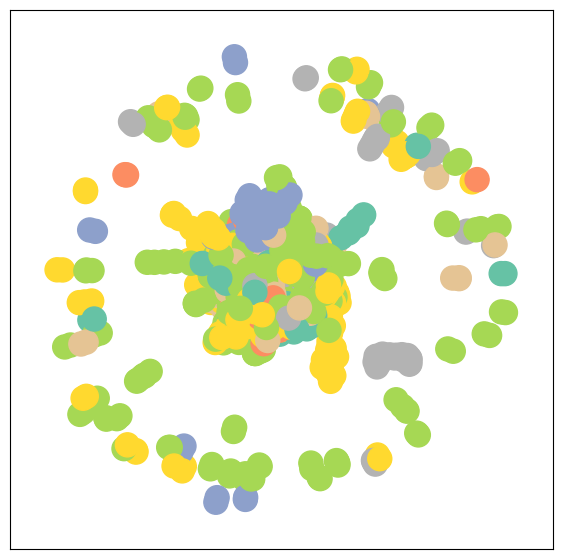

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

## GCN 2 + relu

In this code we create a two layer GCN with a linear classifier. The Forward method is how the input data flows through our model

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = self.conv2(h, edge_index)
        h = h.relu()

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(1433, 4)
  (conv2): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=7, bias=True)
)


## New Cora Embedding Network Visualization

Here we will see how our embeddings look that was created

Embedding shape: [2708, 2]


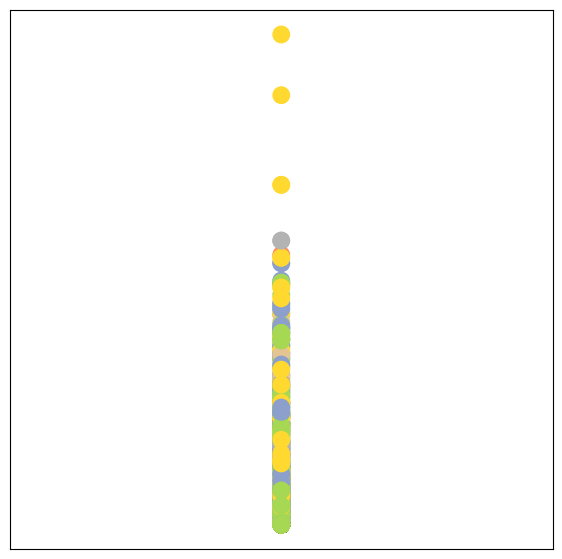

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.y)

## Training on the new Cora Network

<IPython.core.display.Javascript object>

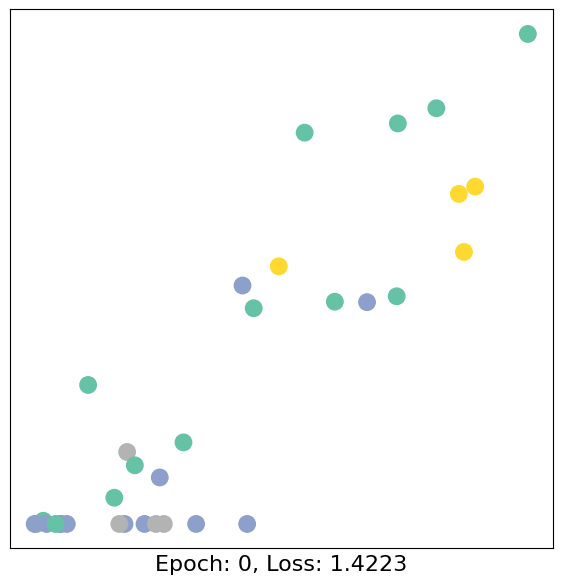

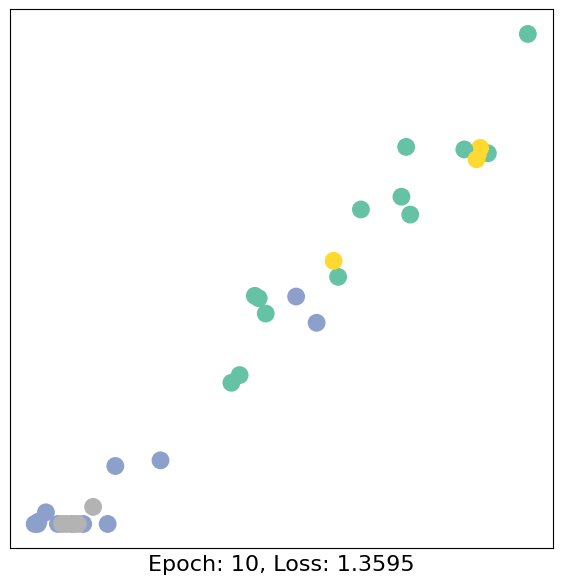

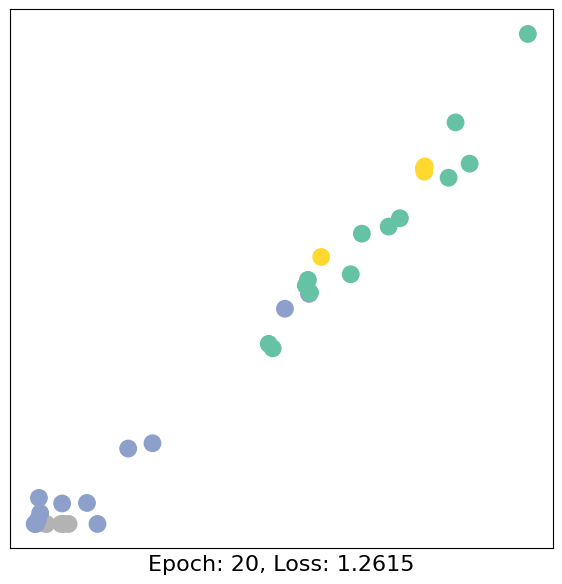

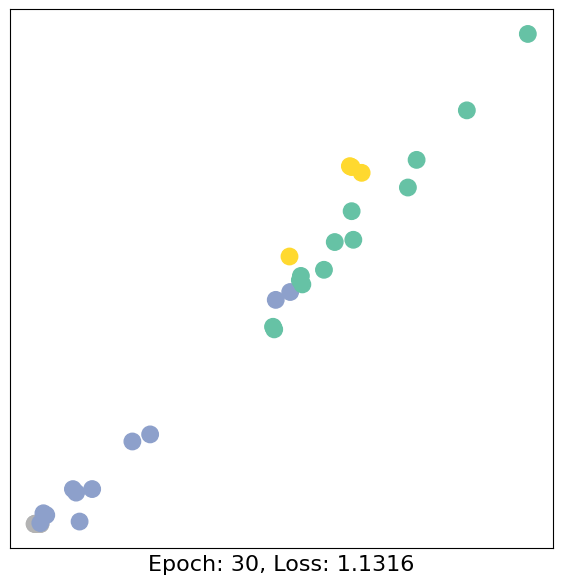

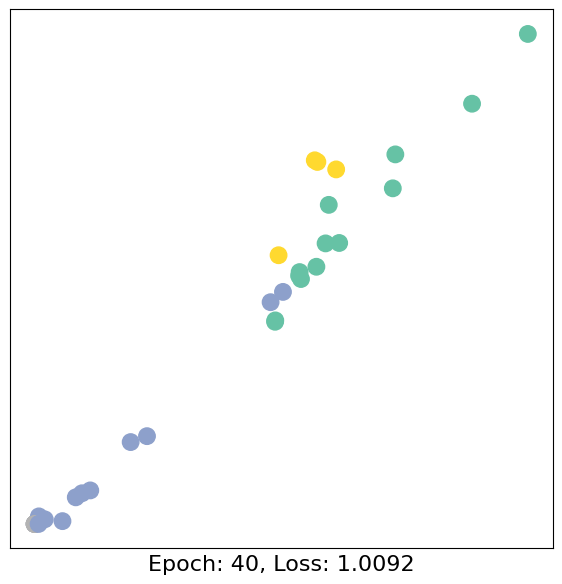

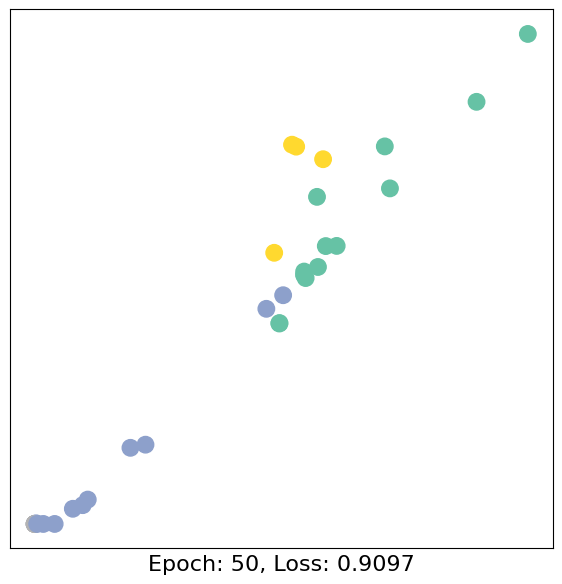

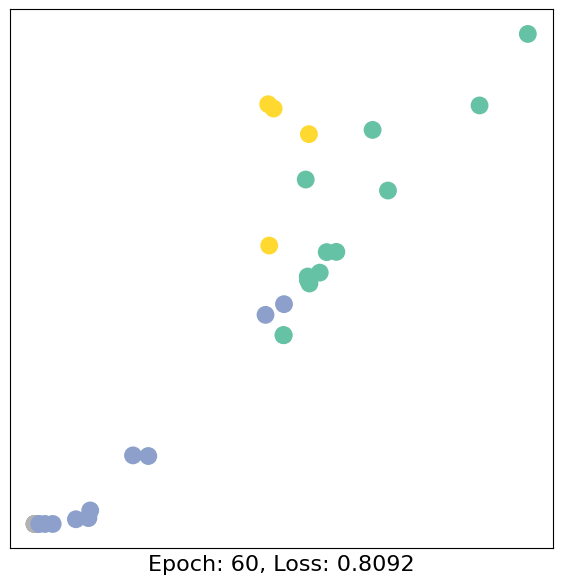

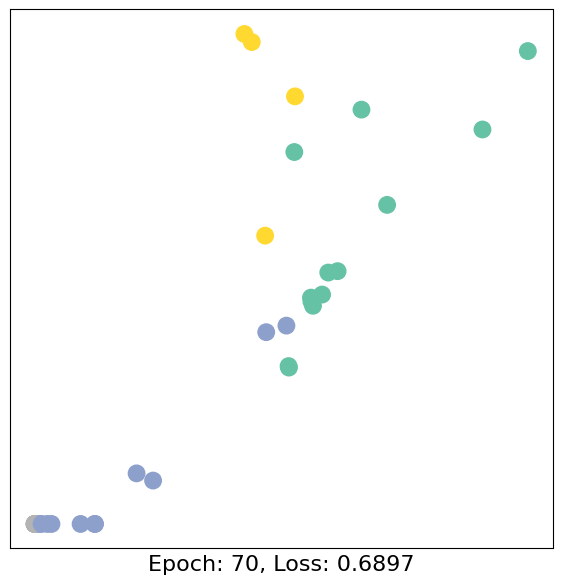

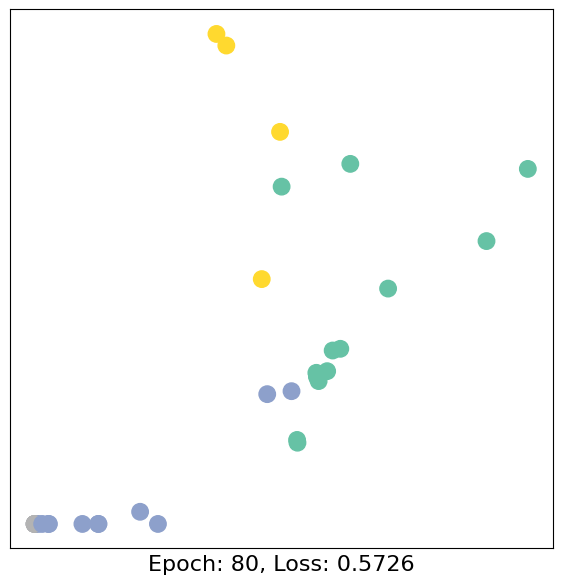

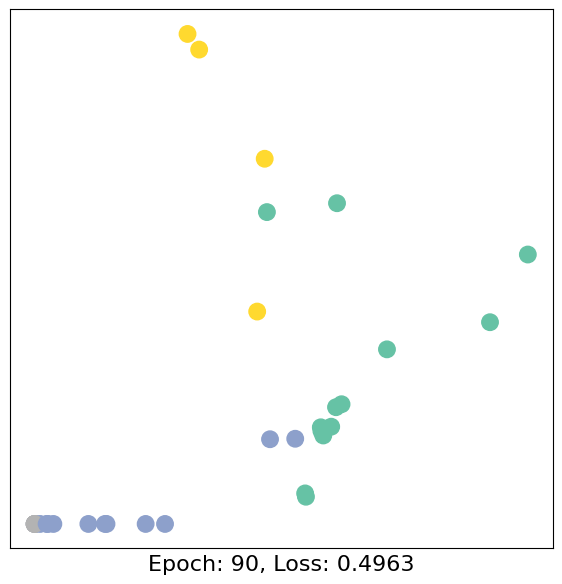

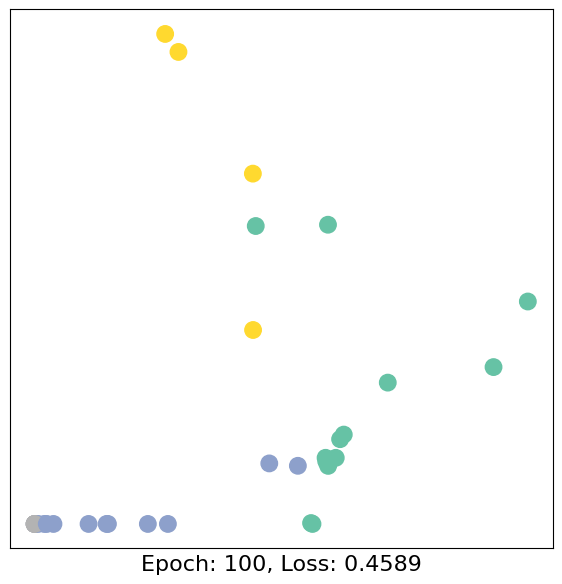

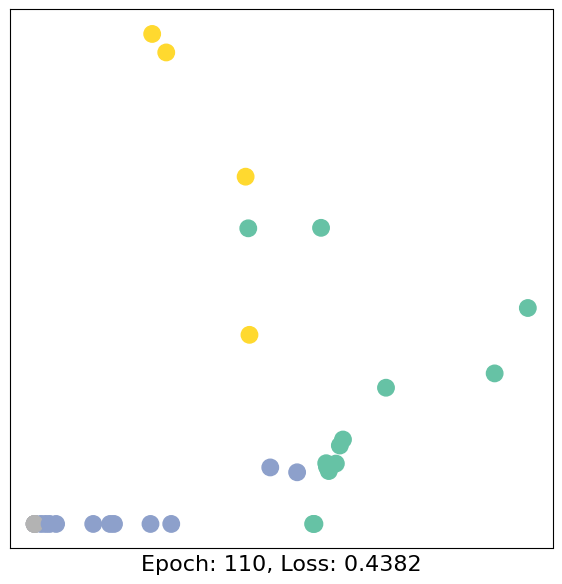

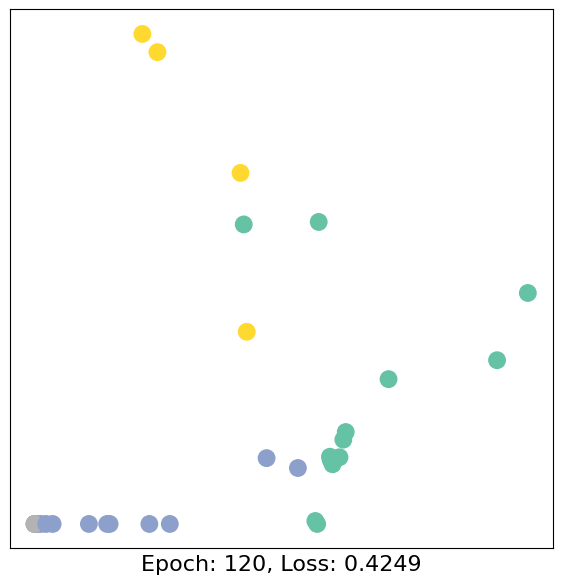

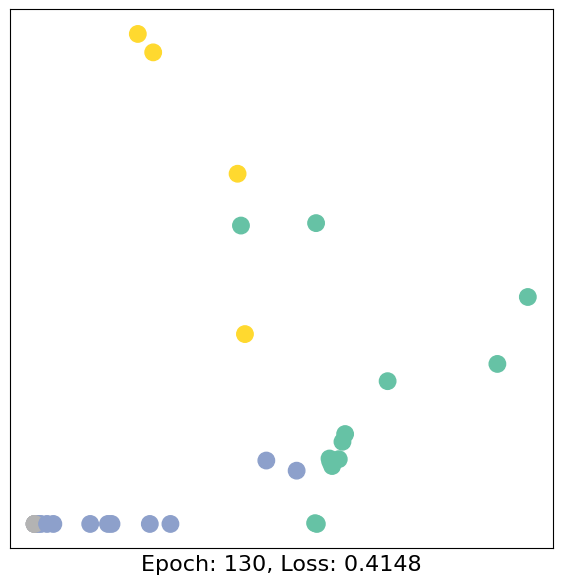

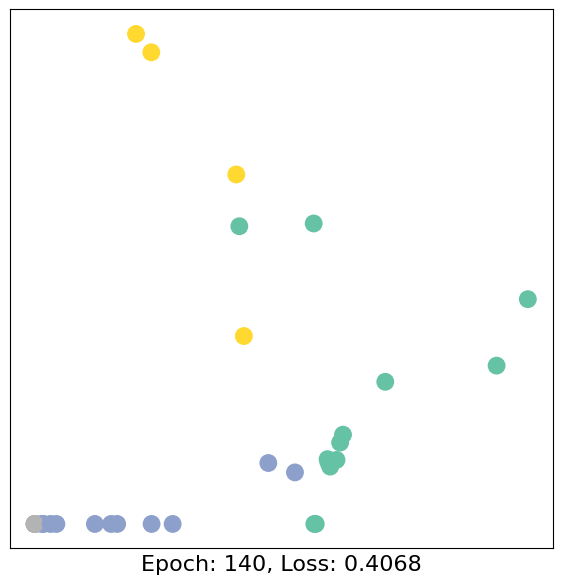

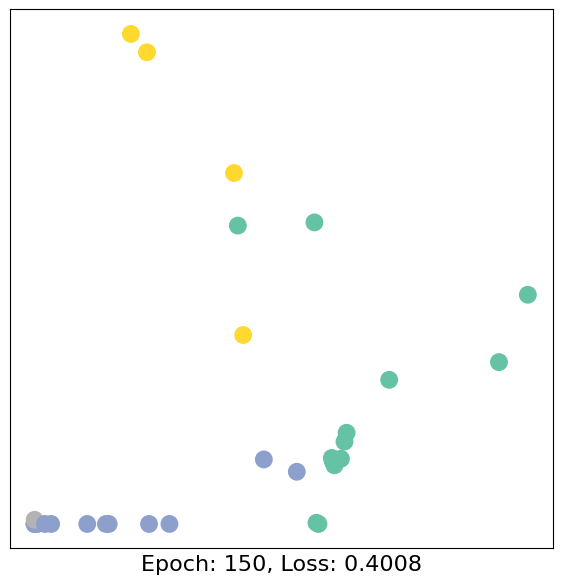

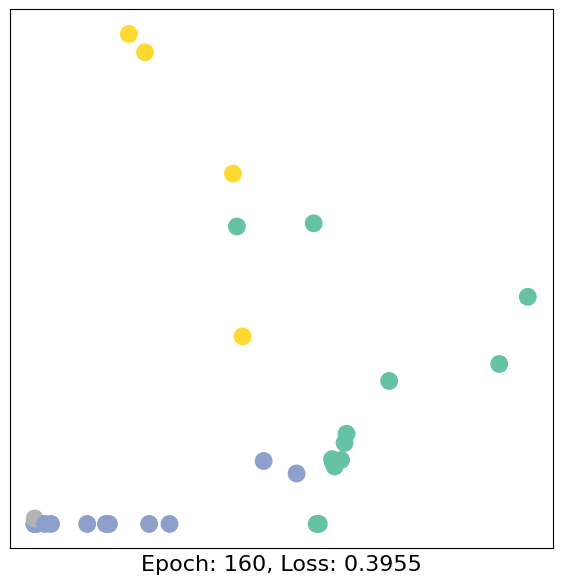

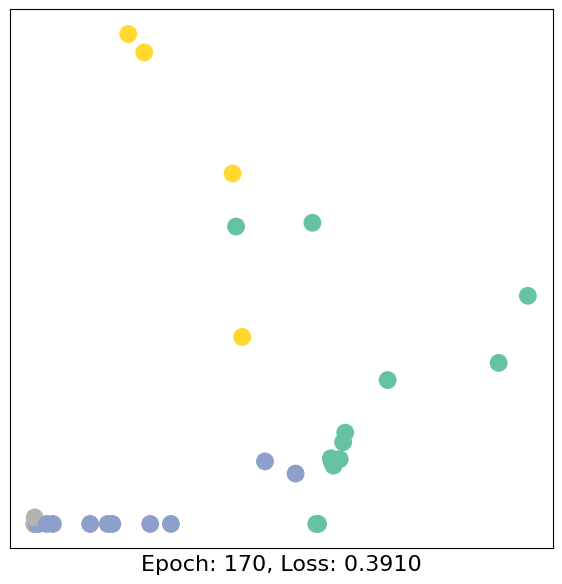

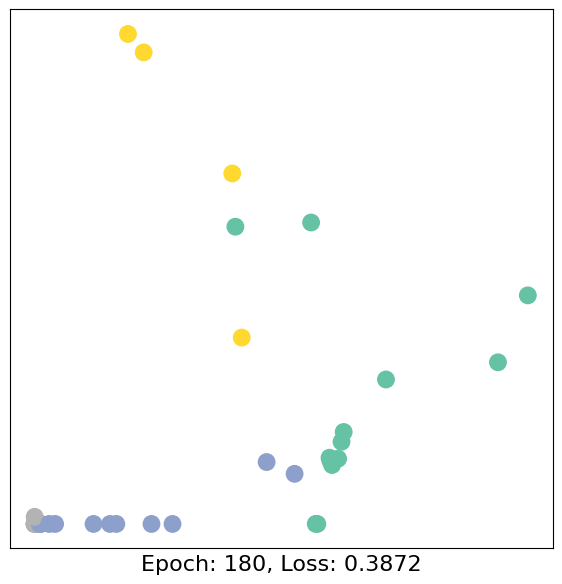

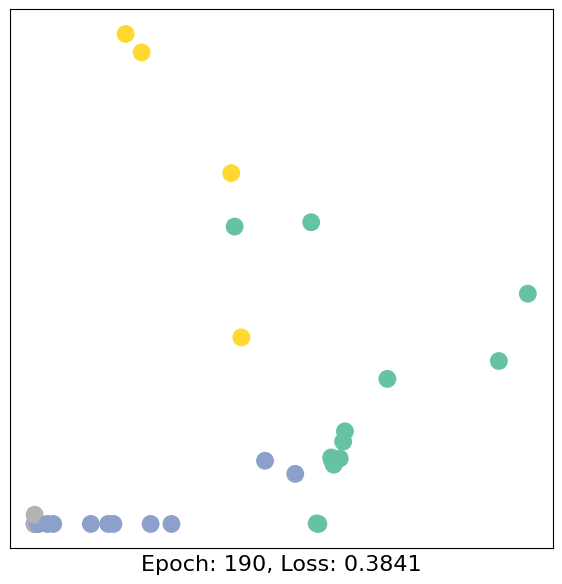

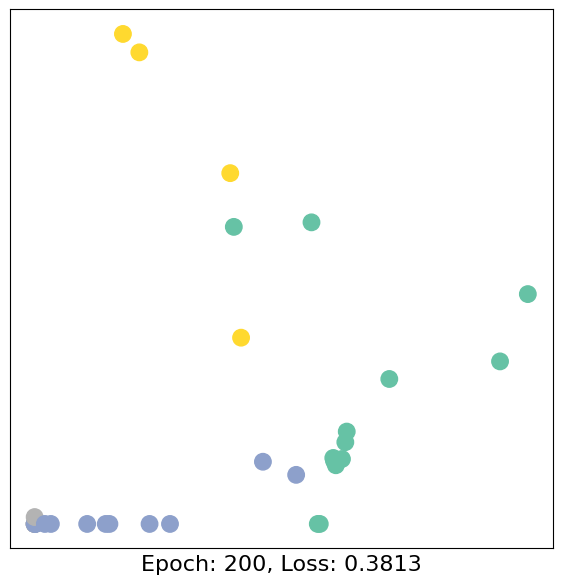

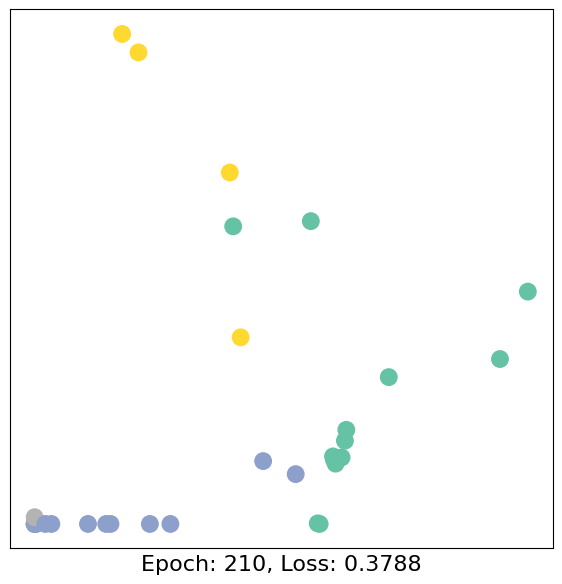

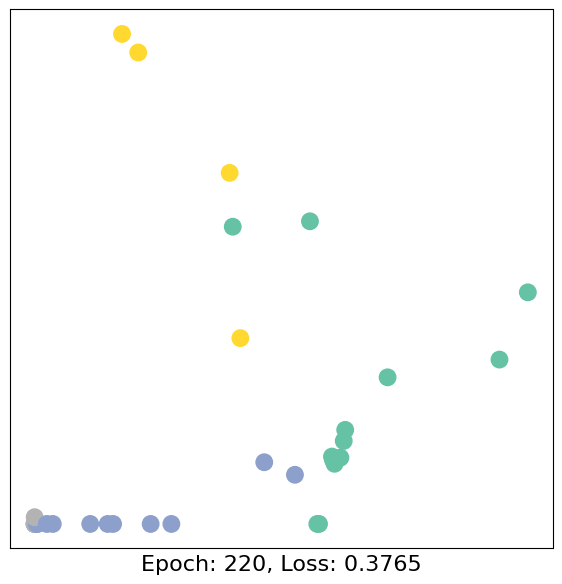

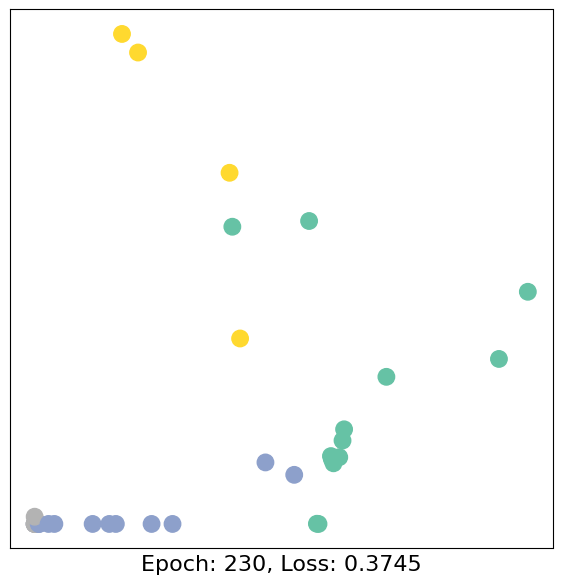

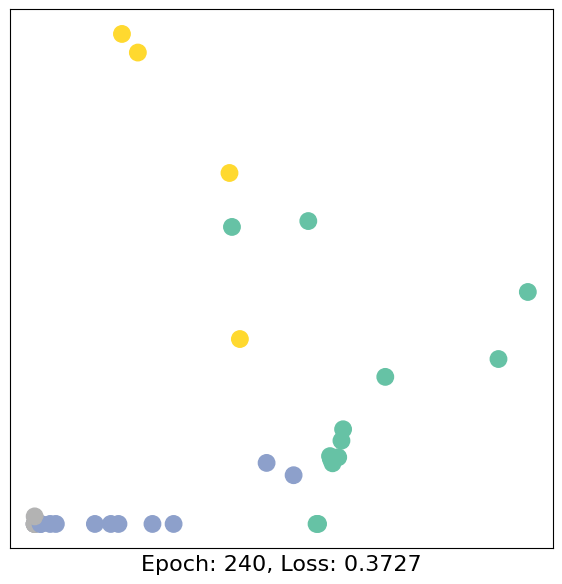

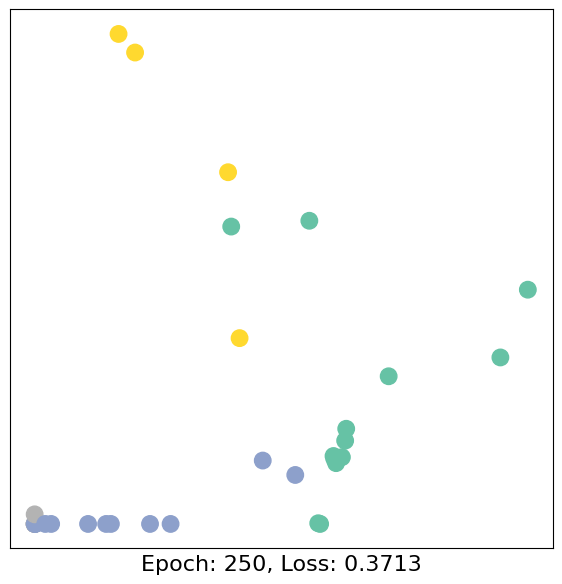

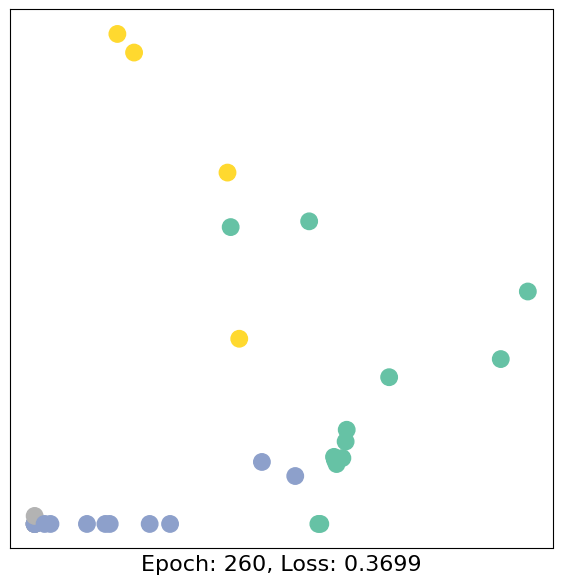

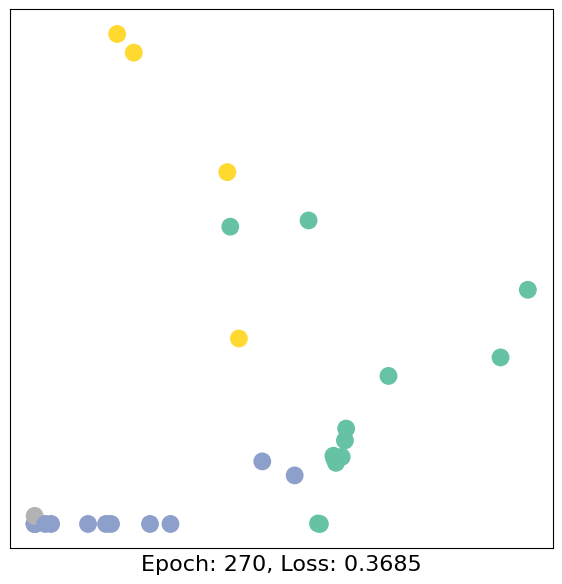

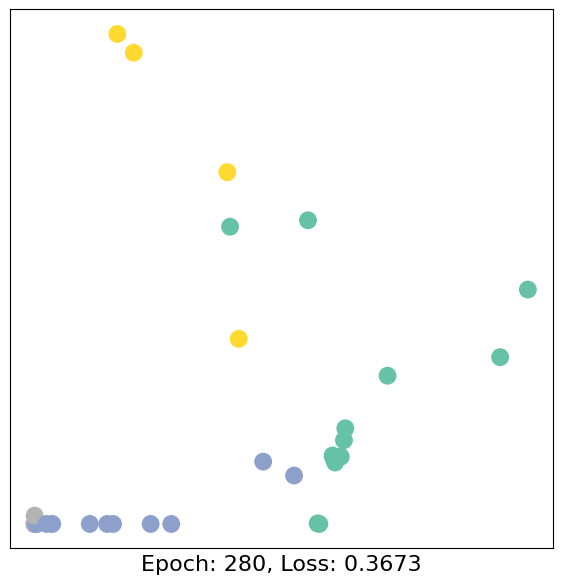

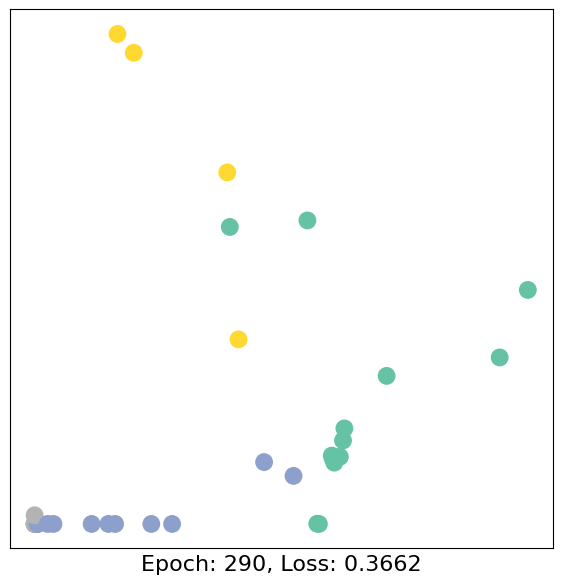

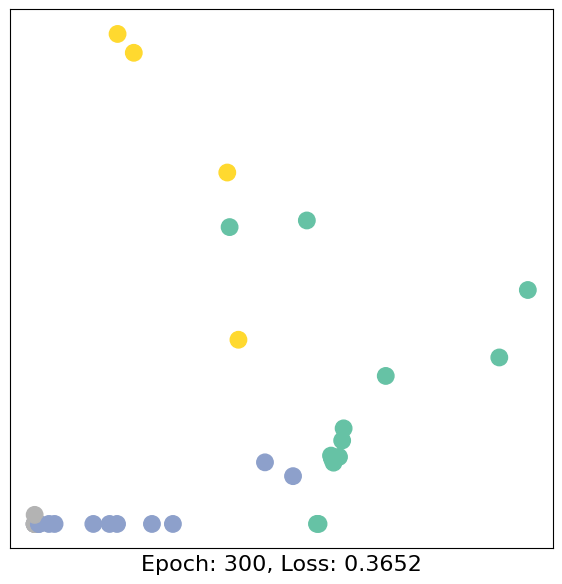

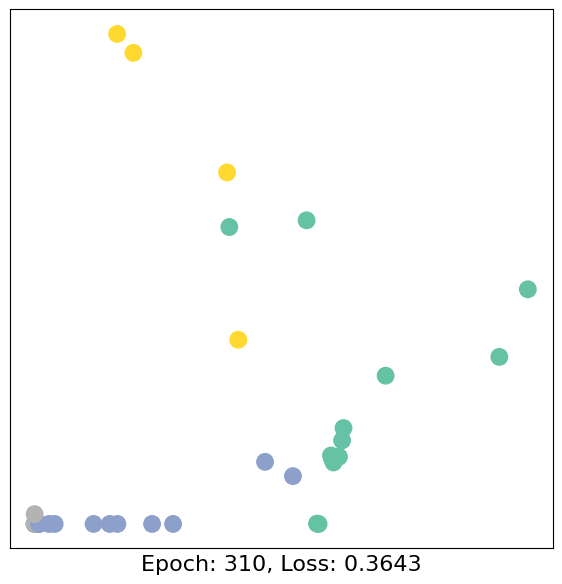

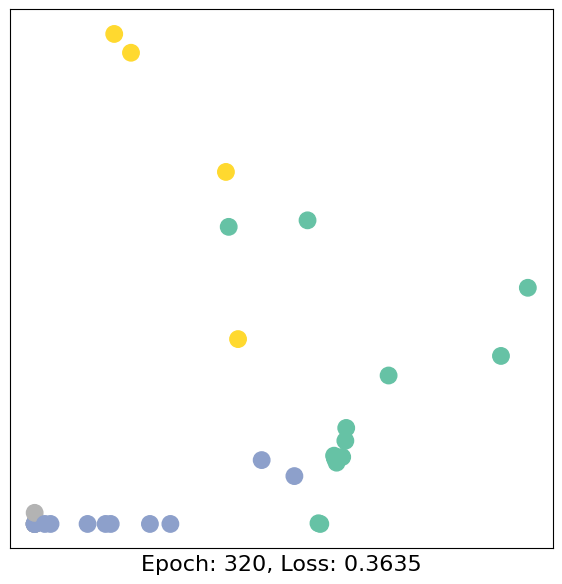

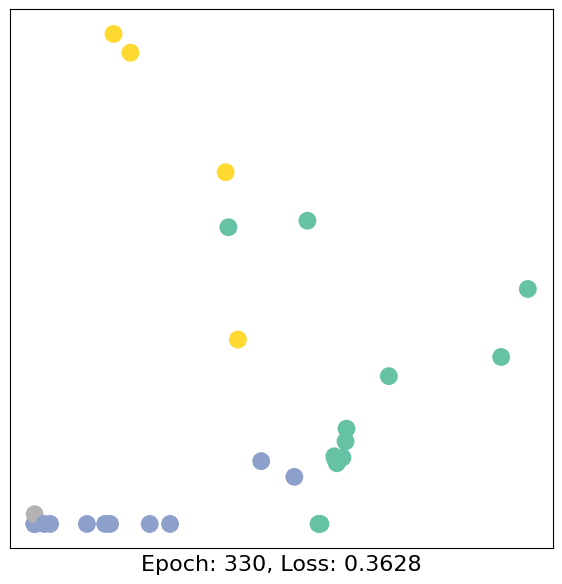

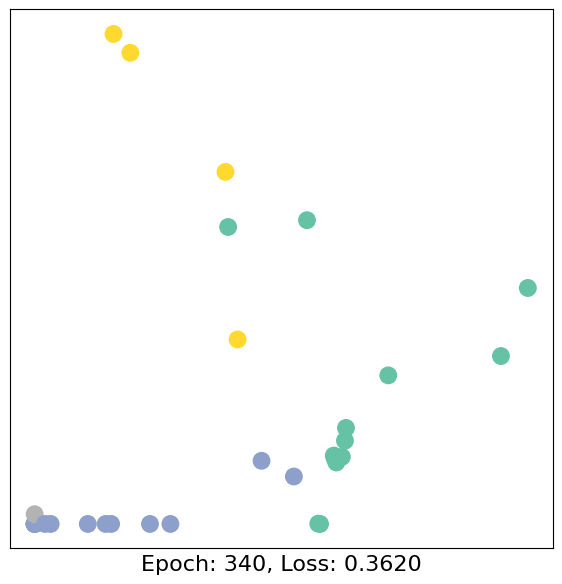

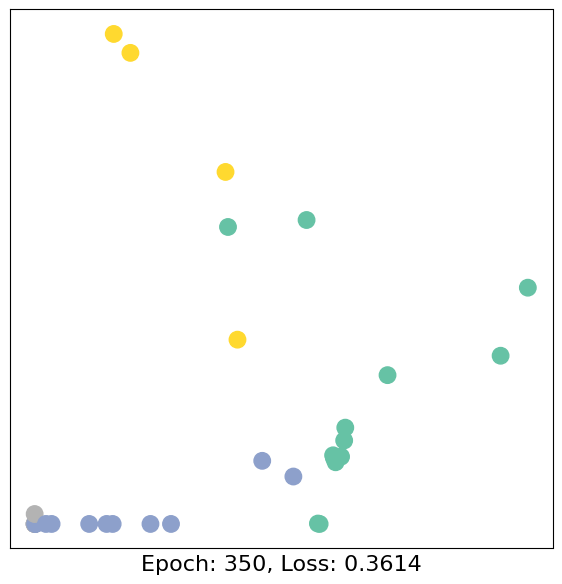

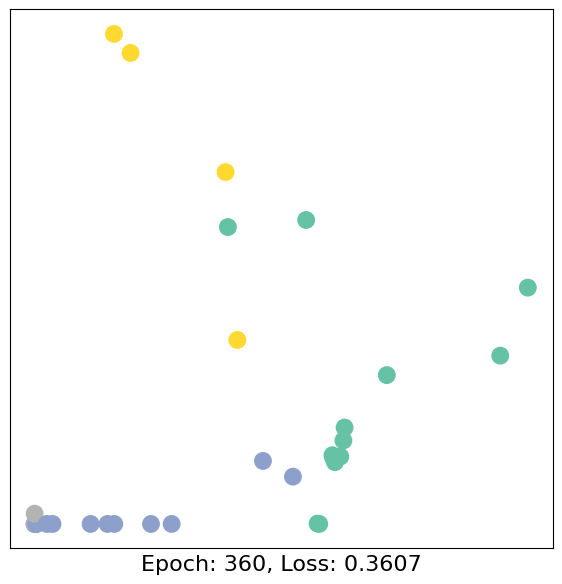

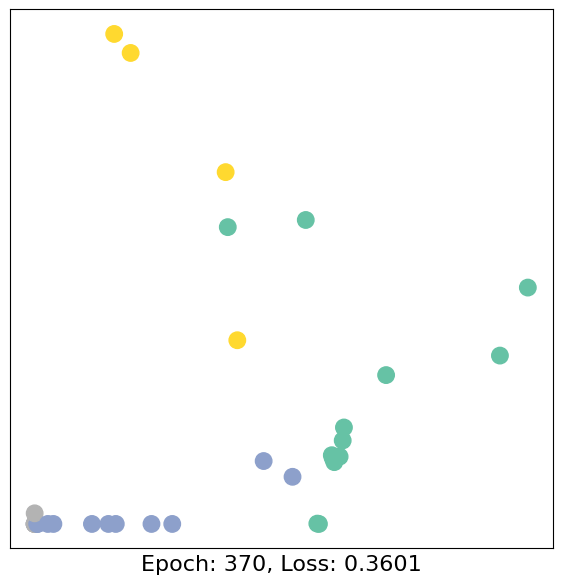

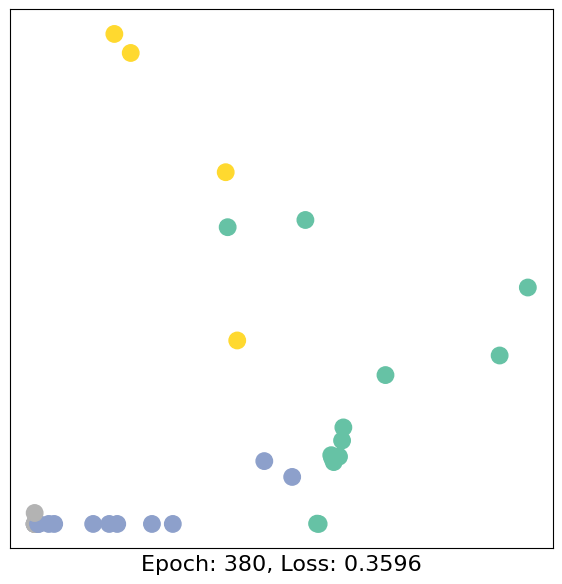

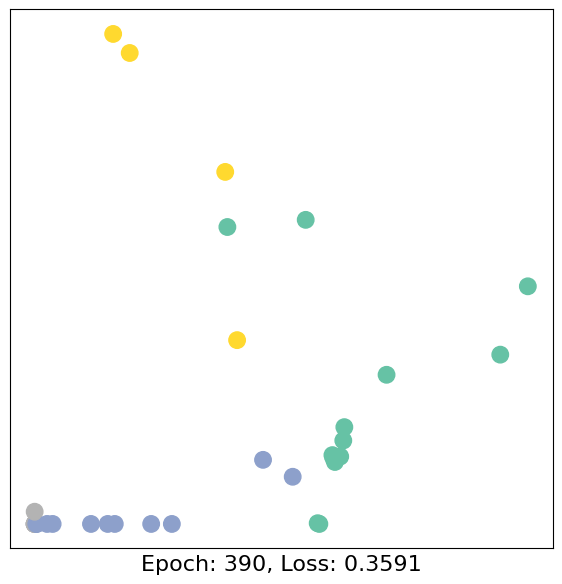

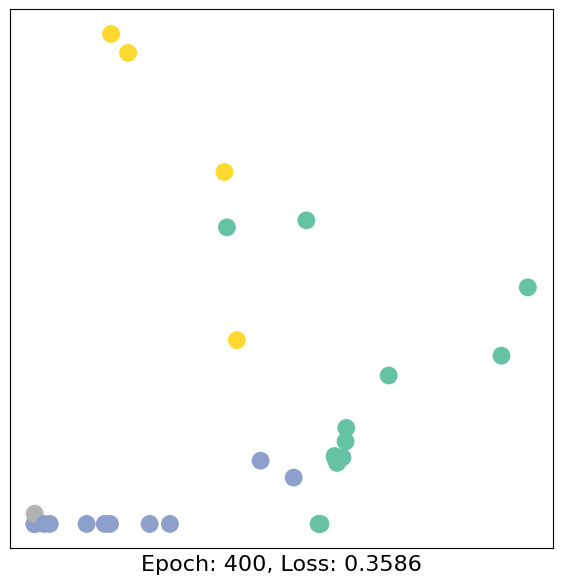

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion. (explain entropy loss)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes. (Page 5 info)
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

@torch.no_grad()
def test(data):
    model.eval()
    log_probs, h = model(data.x, data.edge_index)
    accs = []
    for _, mask in data('train_mask', 'test_mask'):
        pred = log_probs[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs


for epoch in range(401):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

test(data)

# CiteSeer

In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid("", "CiteSeer")
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Processing...


Dataset: CiteSeer():
Number of graphs: 1
Number of features: 3703
Number of classes: 6


Done!


| Dataset  | # of Graphs  | # of Features  | # of Classes  |
|---|---|---|---|
| CiteSeer  | 1  | 3703   | 6  |

In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])
Number of nodes: 3327
Number of edges: 9104
Average node degree: 2.74
Number of training nodes: 120
Training node label rate: 0.04
Has isolated nodes: True
Has self-loops: False
Is undirected: True


| Dataset  | # of Nodes  | # of Edges  |  Average node degree | Number of training nodes|
|---|---|---|---|---|
| CiteSeer  | 3327  | 9104   | 2.74  | 120|

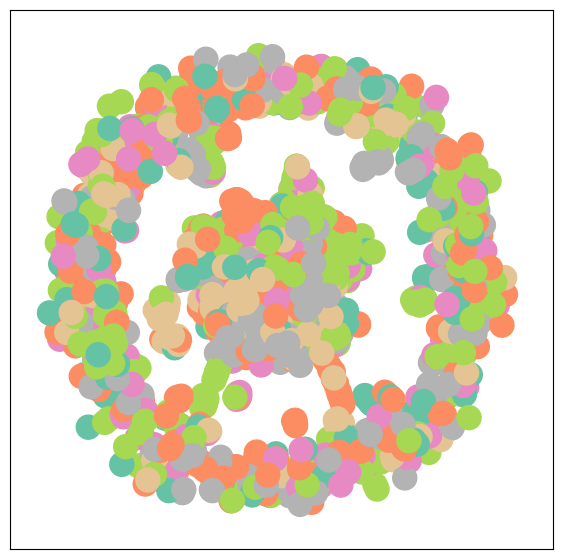

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

## GCN 2 + relu

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = self.conv2(h, edge_index)
        h = h.relu()

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(3703, 4)
  (conv2): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=6, bias=True)
)


## New SiteSeer Embedding Network Visualization

Here we will see how our embeddings look that was created

Embedding shape: [3327, 2]


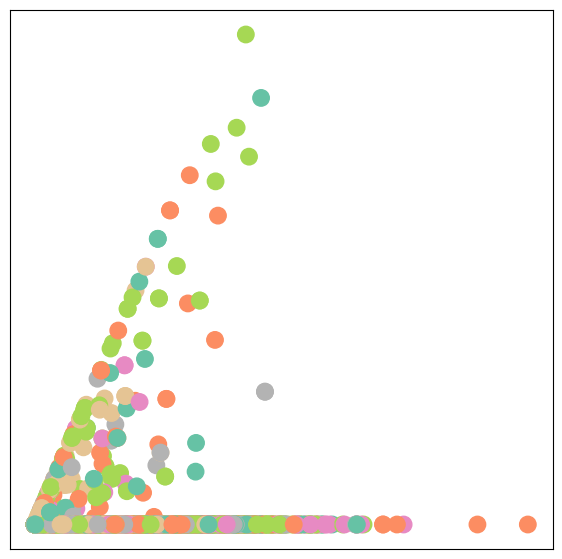

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.y)

## Training on the new SiteSeer Network

<IPython.core.display.Javascript object>

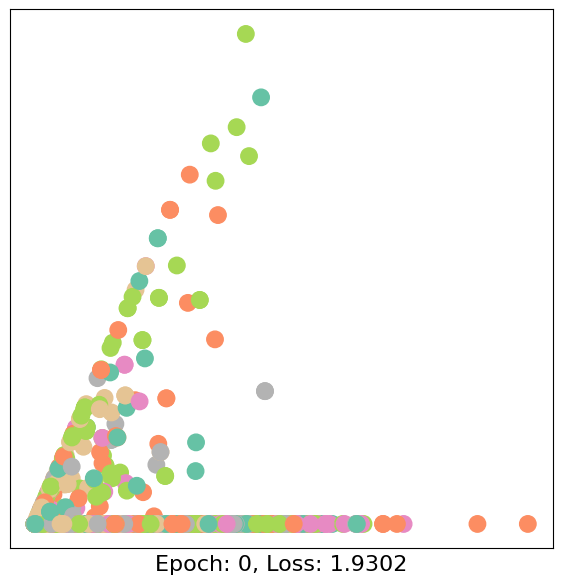

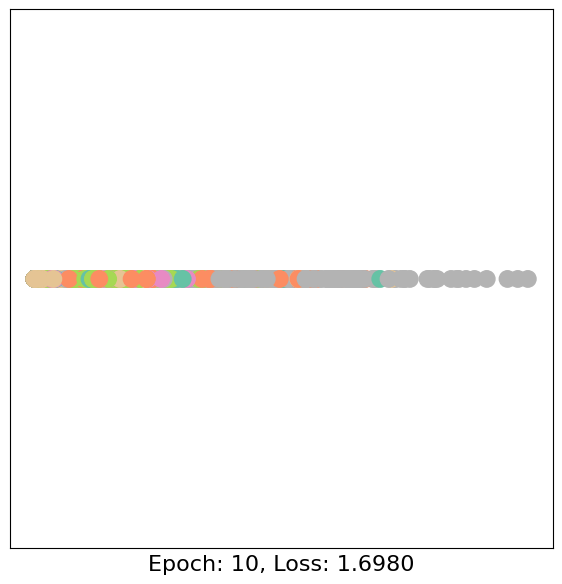

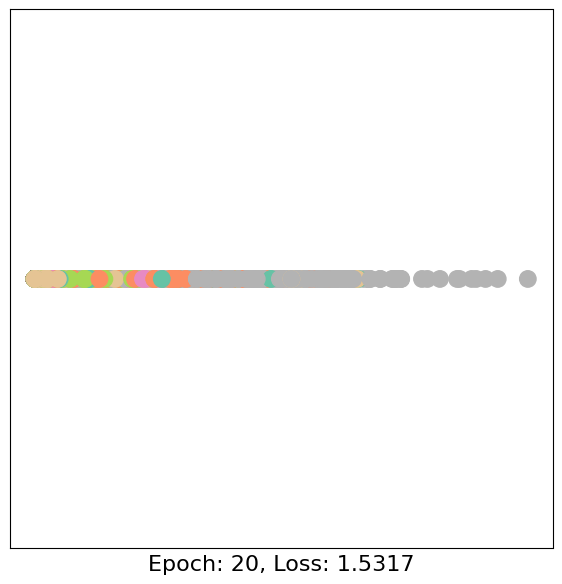

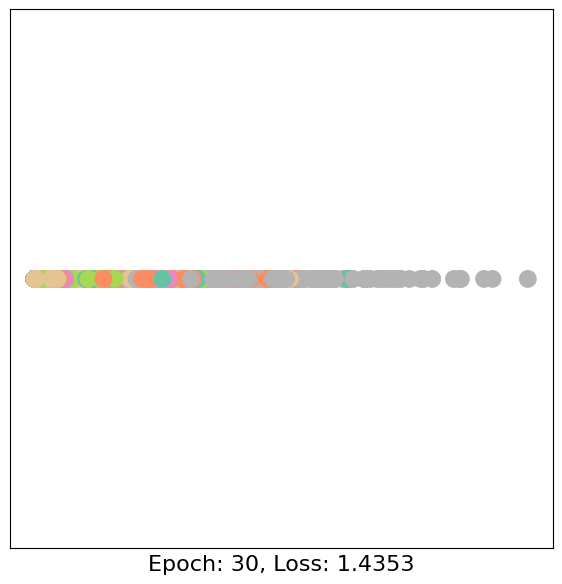

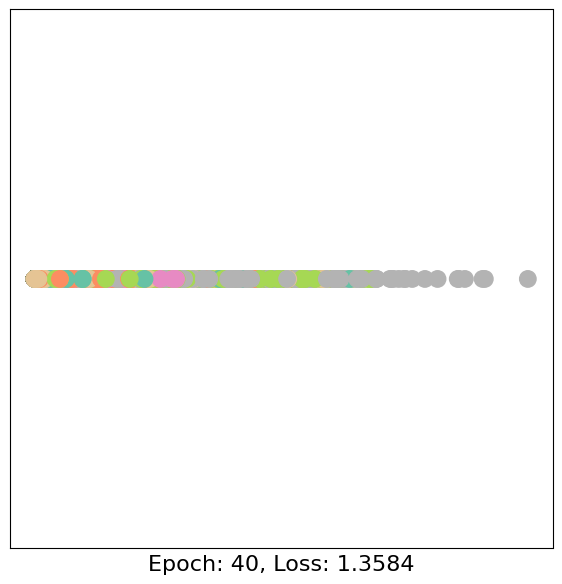

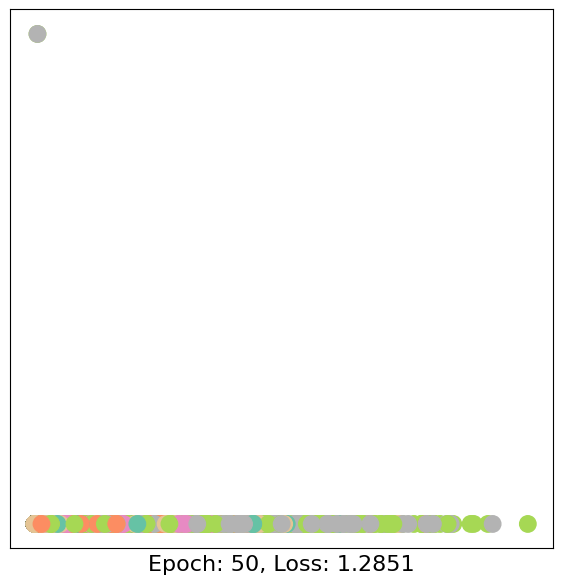

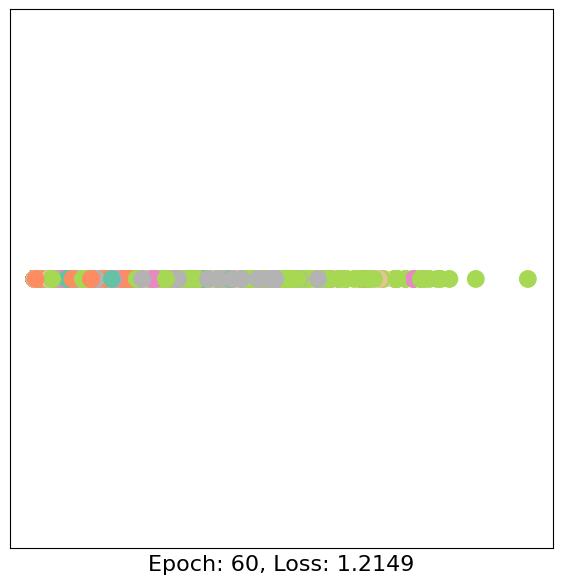

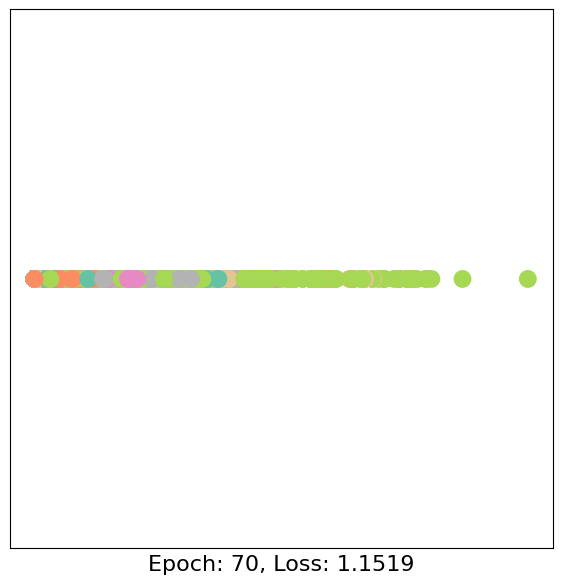

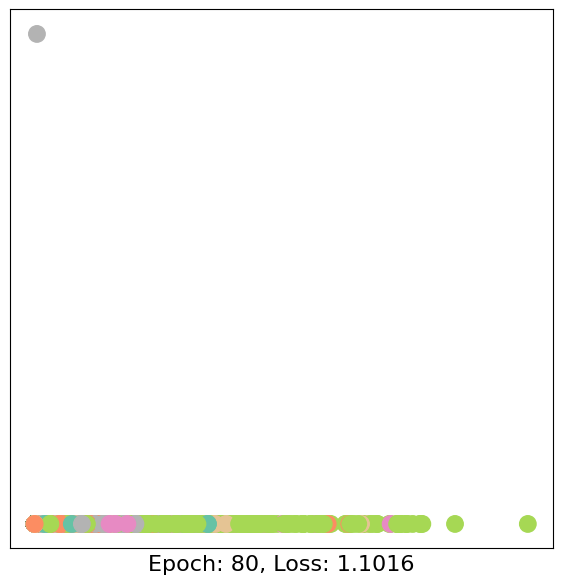

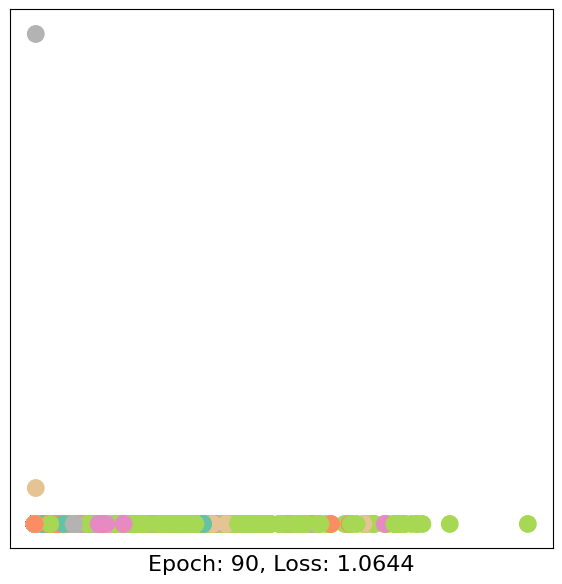

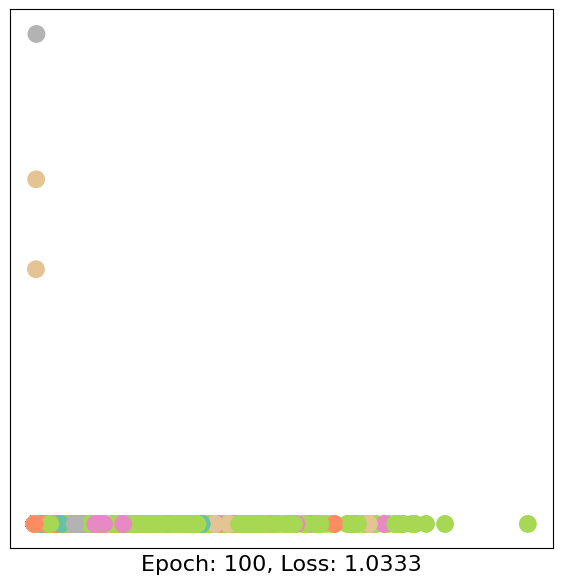

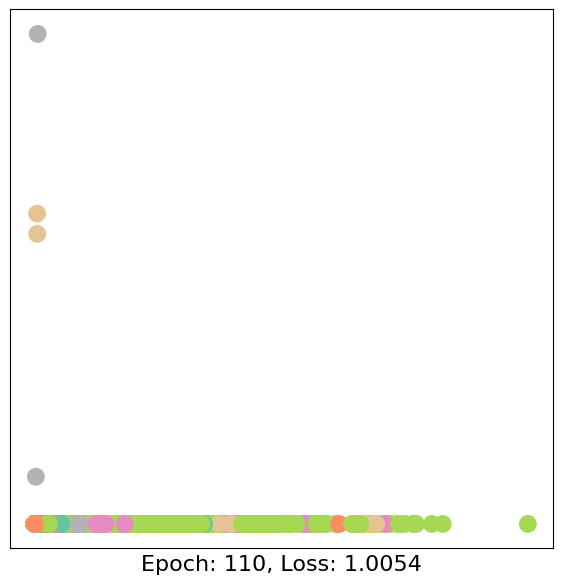

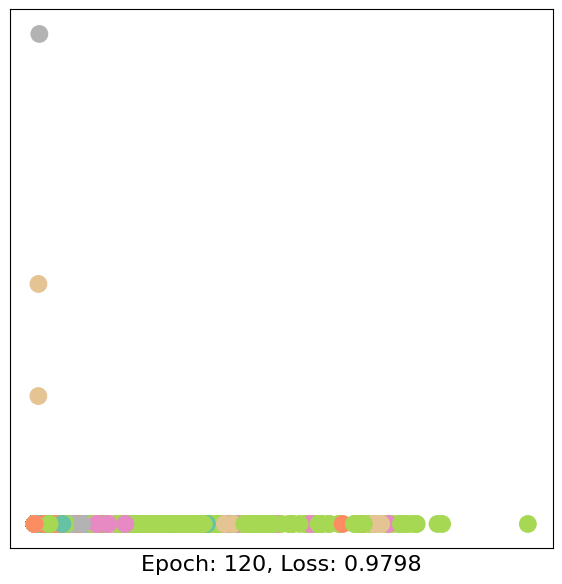

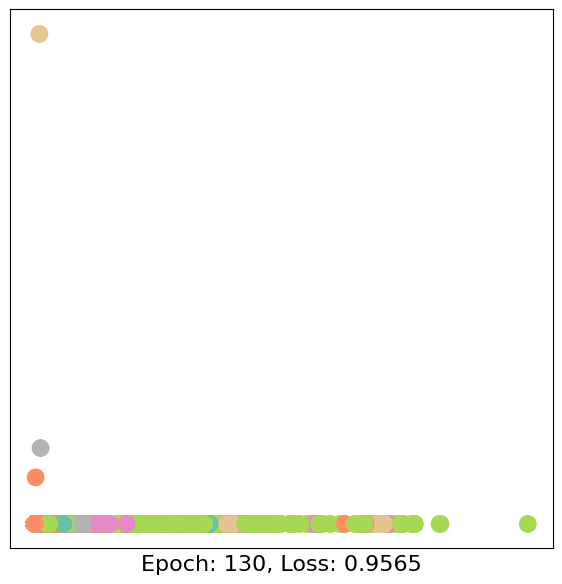

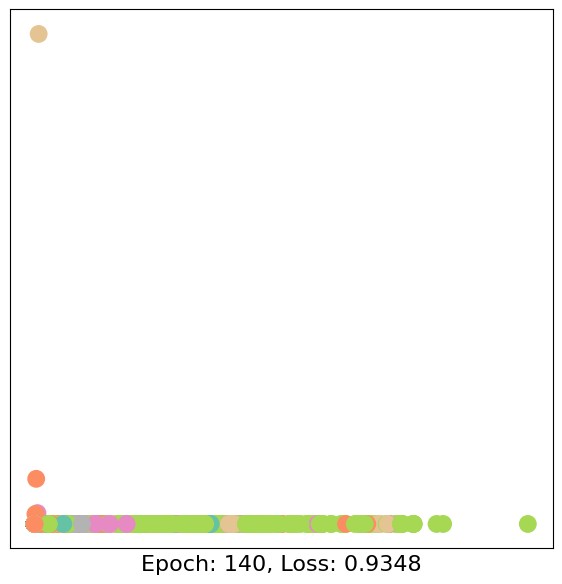

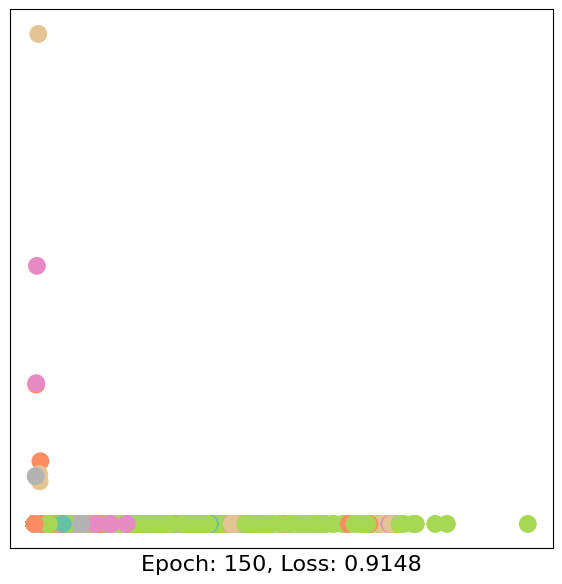

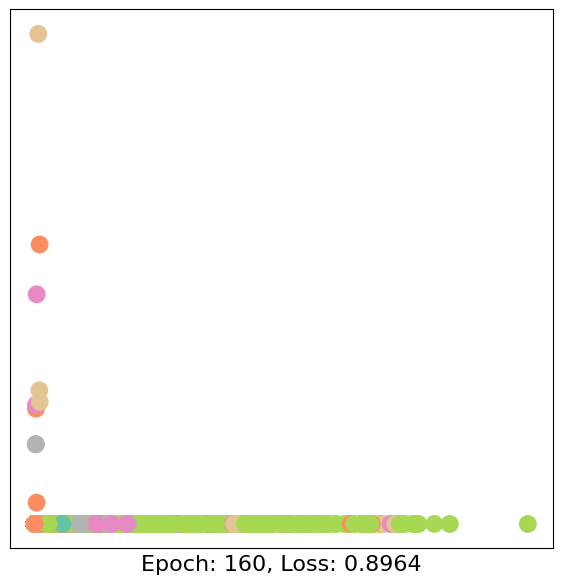

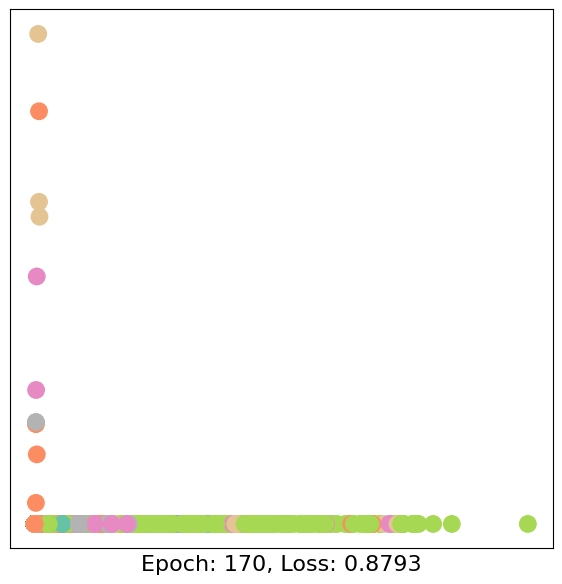

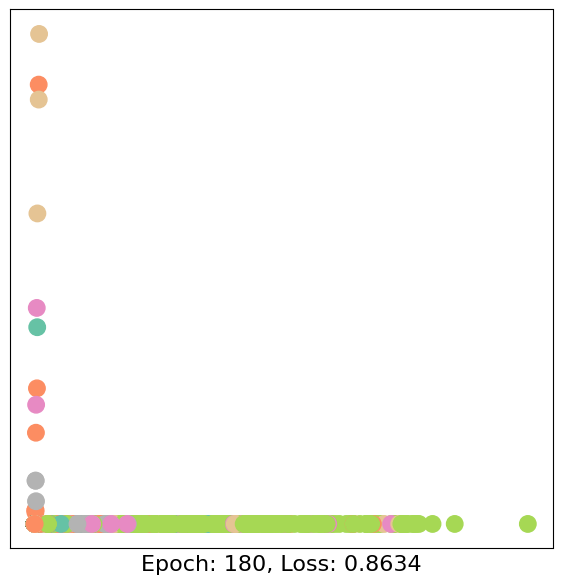

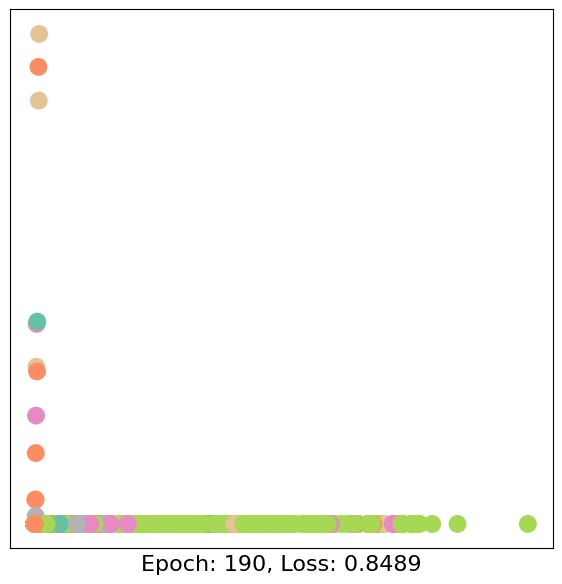

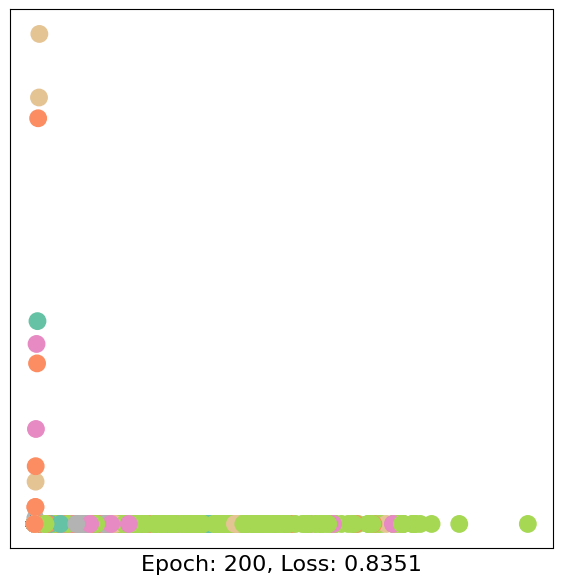

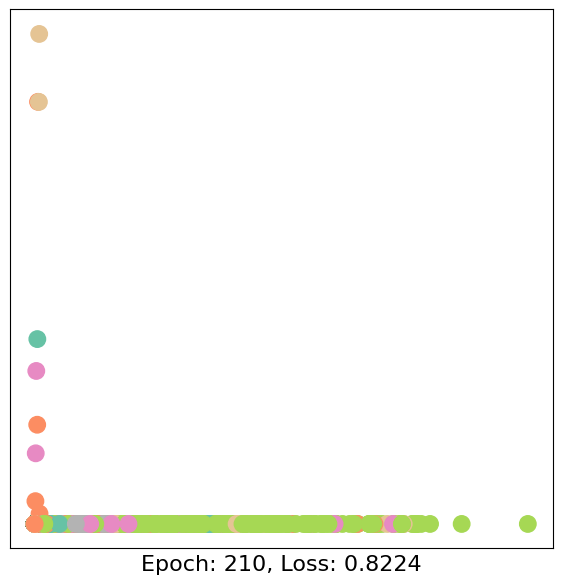

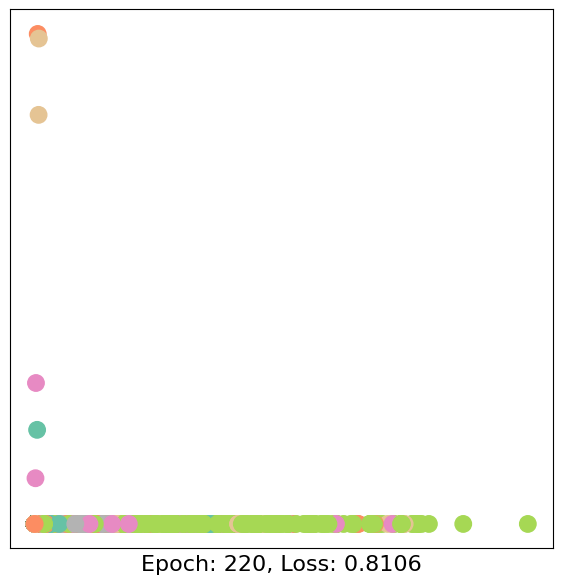

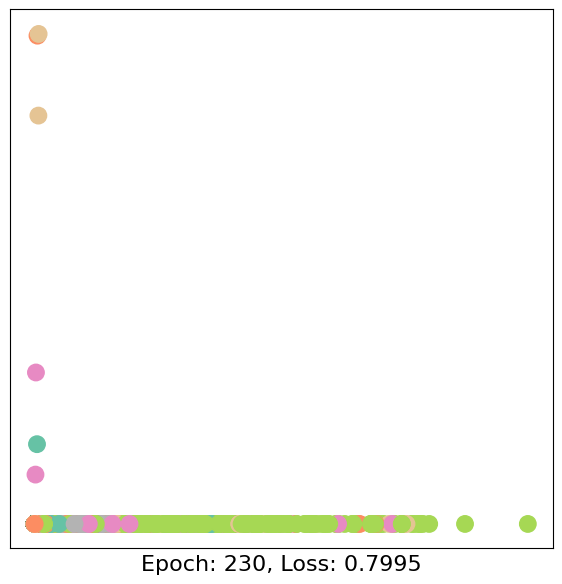

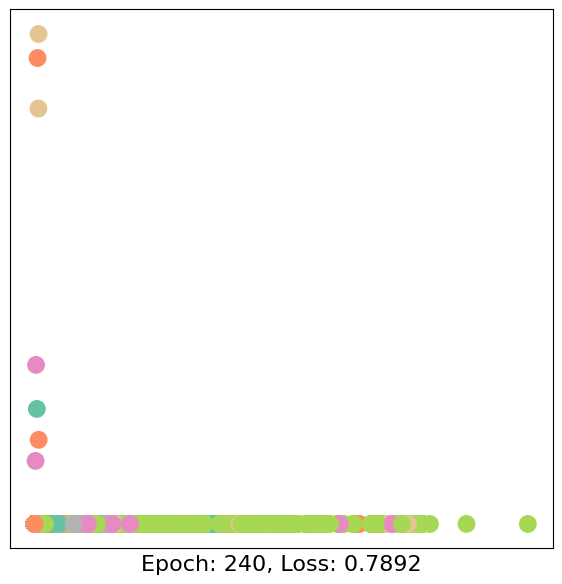

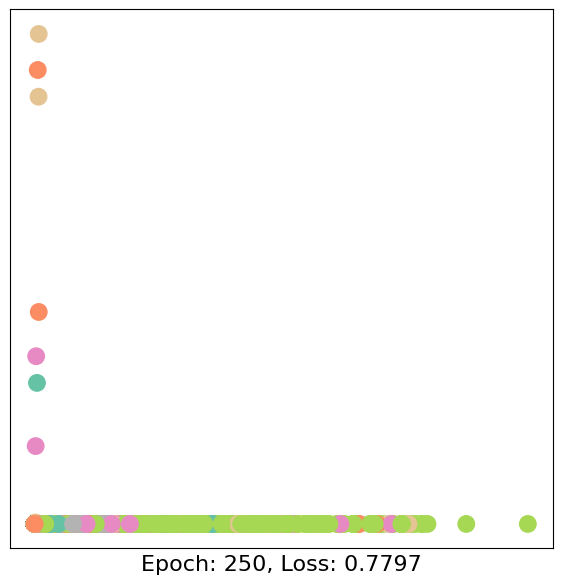

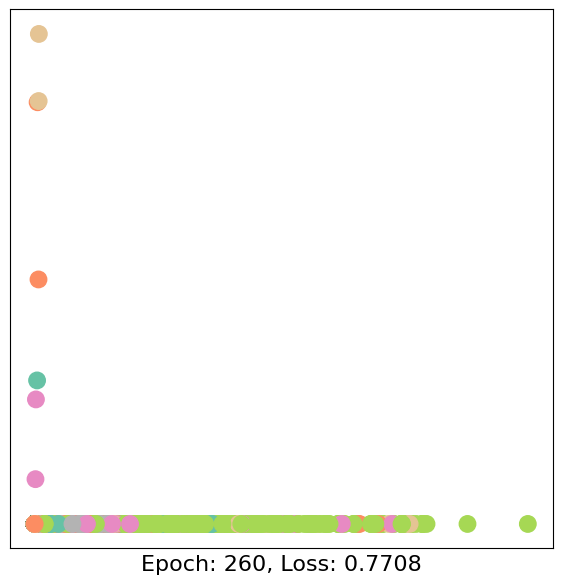

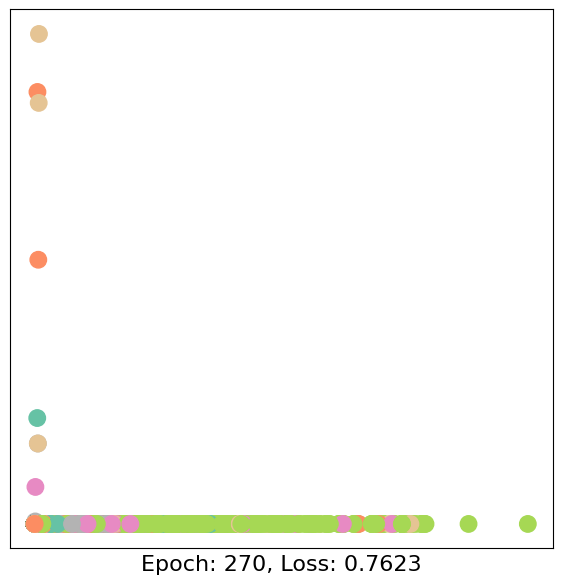

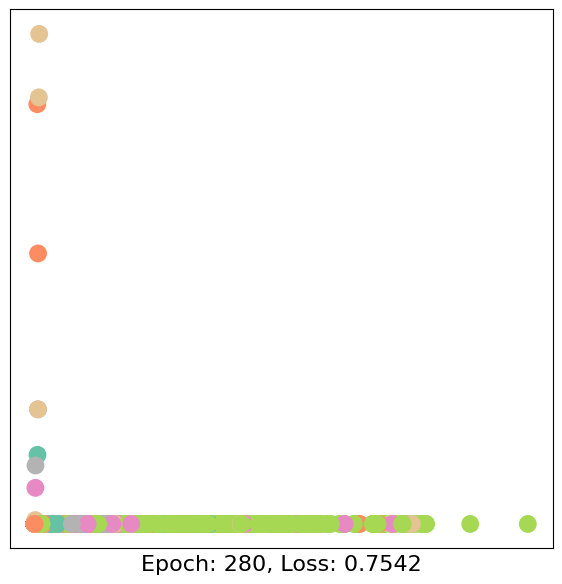

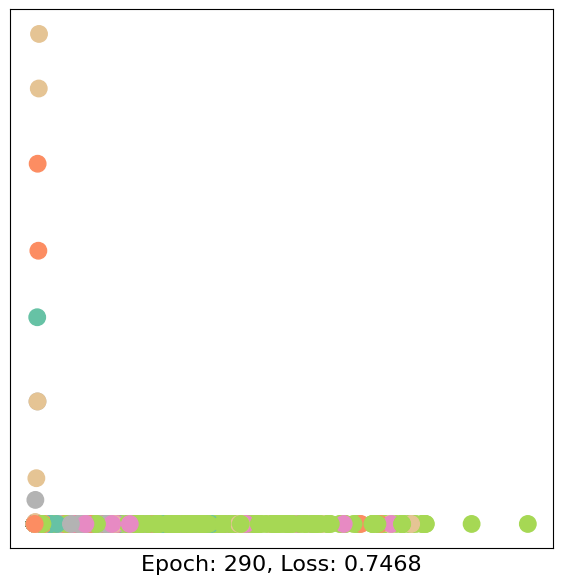

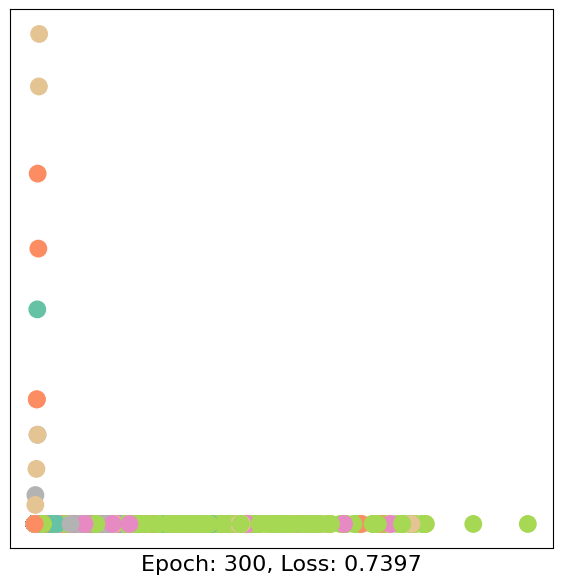

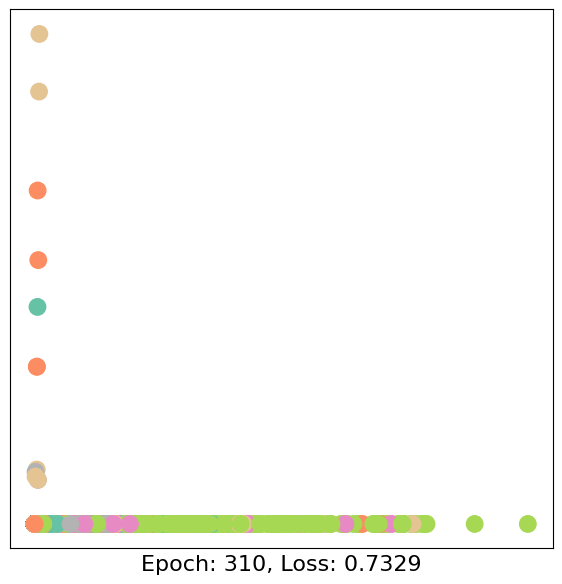

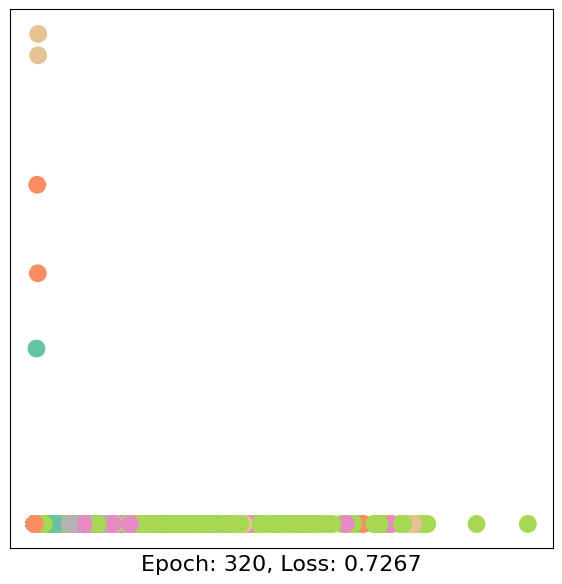

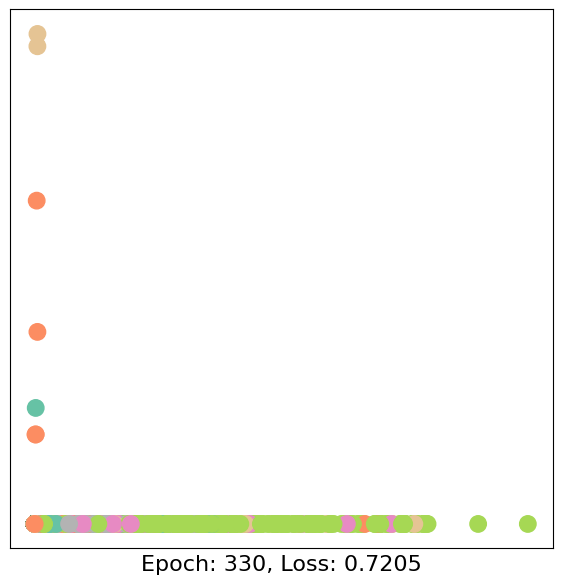

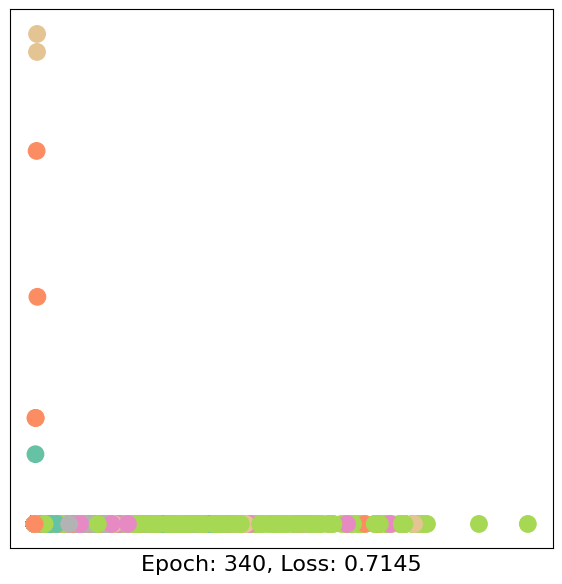

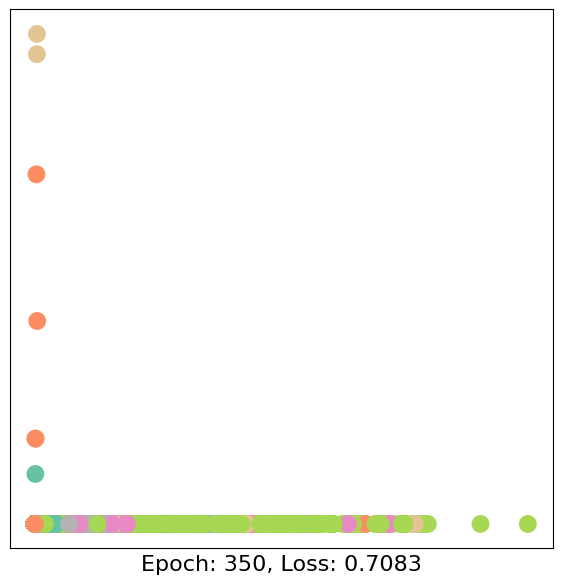

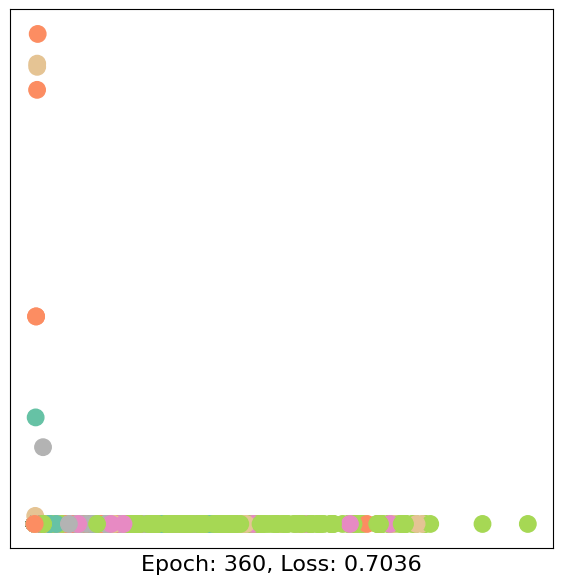

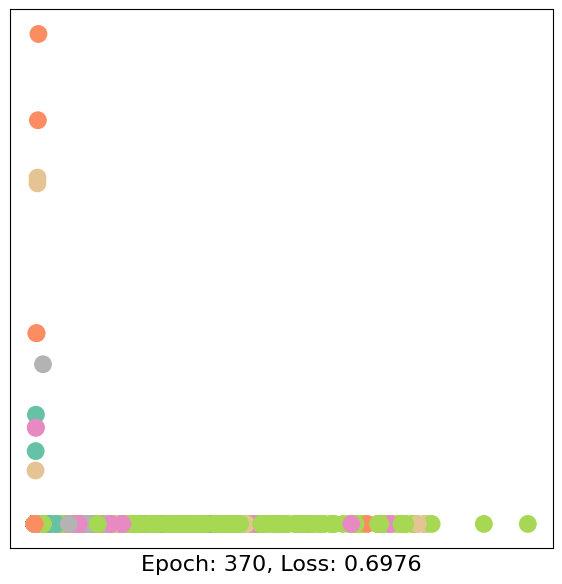

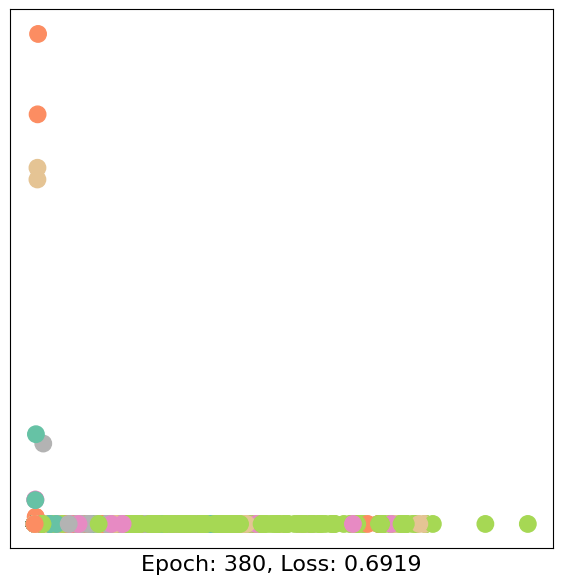

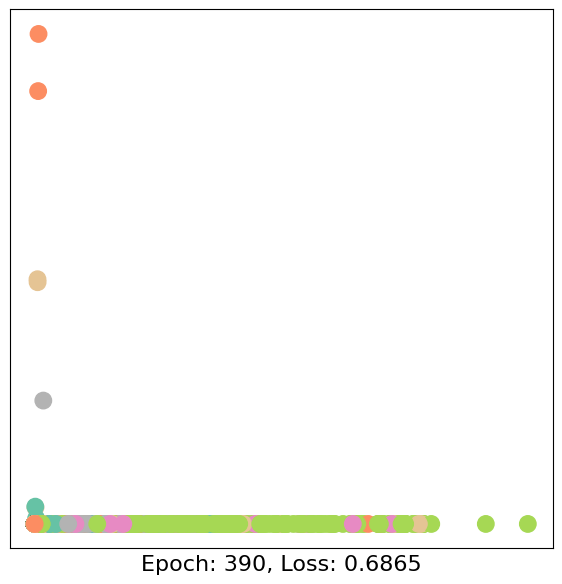

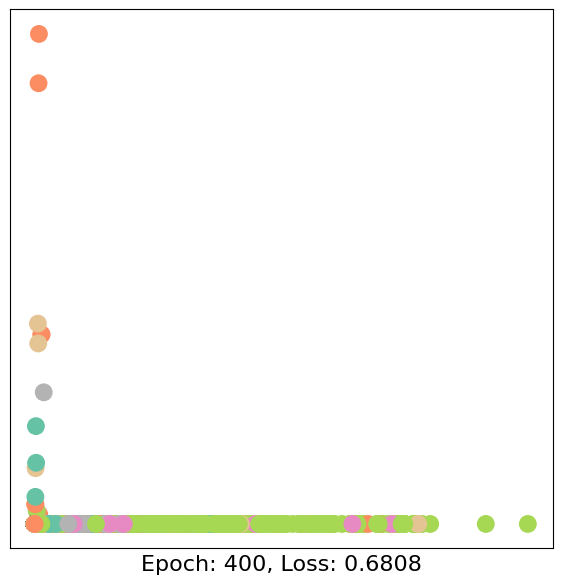

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion. (explain entropy loss)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes. (Page 5 info)
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

@torch.no_grad()
def test(data):
    model.eval()
    log_probs, h = model(data.x, data.edge_index)
    accs = []
    for _, mask in data('train_mask', 'test_mask'):
        pred = log_probs[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs


for epoch in range(401):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

test(data)

# PubMed

In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid("", "PubMed")
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Processing...


Dataset: PubMed():
Number of graphs: 1
Number of features: 500
Number of classes: 3


Done!


| Dataset  | # of Graphs  | # of Features  | # of Classes  |
|---|---|---|---|
| Karate Club  | 1  | 500   | 3  |

In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[19717, 500], edge_index=[2, 88648], y=[19717], train_mask=[19717], val_mask=[19717], test_mask=[19717])
Number of nodes: 19717
Number of edges: 88648
Average node degree: 4.50
Number of training nodes: 60
Training node label rate: 0.00
Has isolated nodes: False
Has self-loops: False
Is undirected: True


| Dataset  | # of Nodes  | # of Edges  |  Average node degree | Number of training nodes|
|---|---|---|---|---|
| Karate Club  | 19917  | 88648   | 4.50  | 60|

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

## GCN 2 + relu

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = self.conv2(h, edge_index)
        h = h.relu()

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(500, 4)
  (conv2): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=3, bias=True)
)


## New PubMed Embedding Network Visualization

Here we will see how our embeddings look that was created

Embedding shape: [19717, 2]


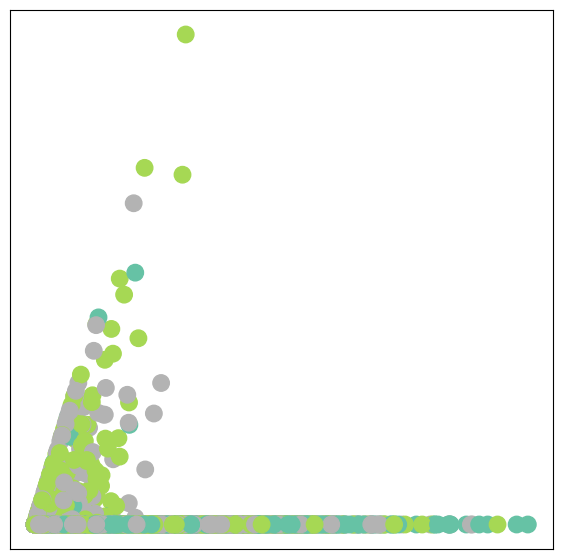

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.y)

## Training on the new PubMed Network

<IPython.core.display.Javascript object>

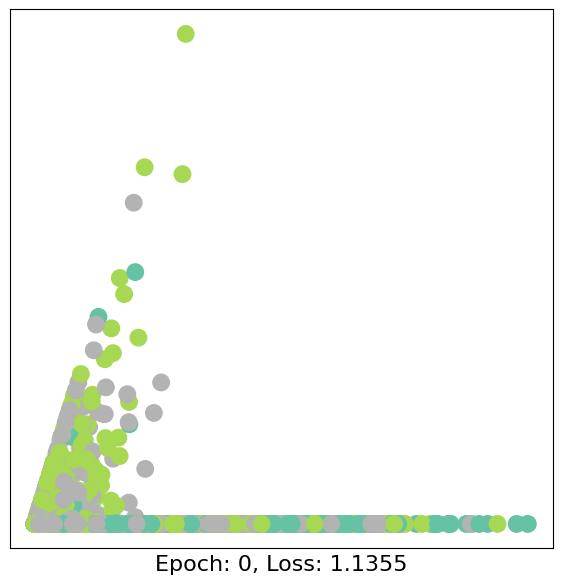

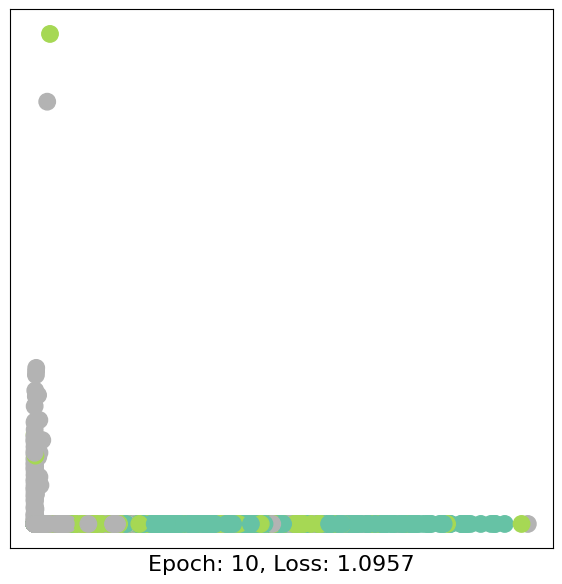

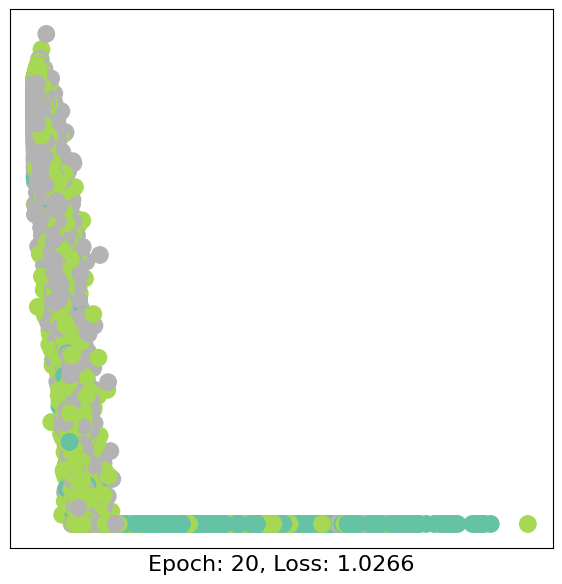

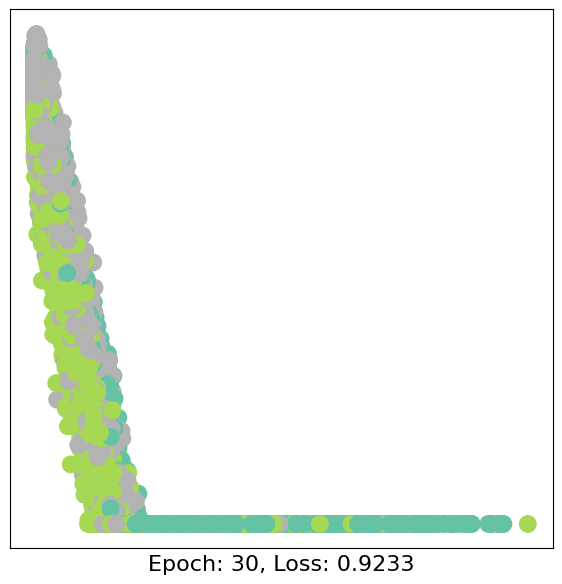

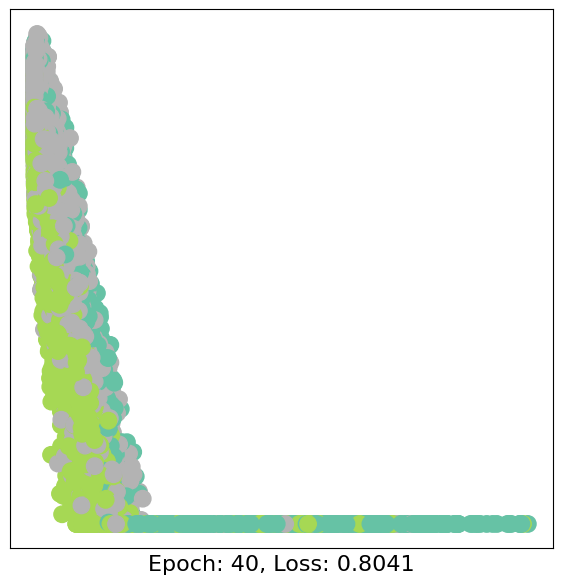

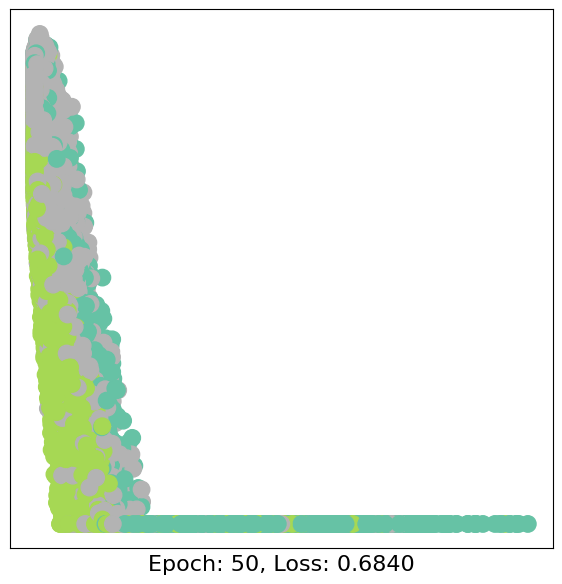

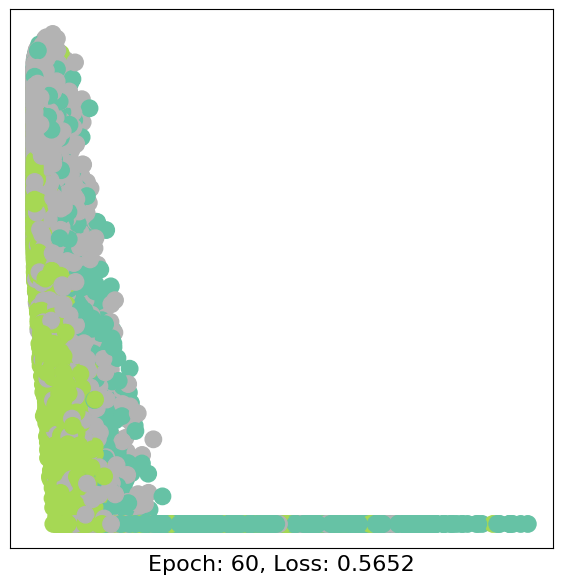

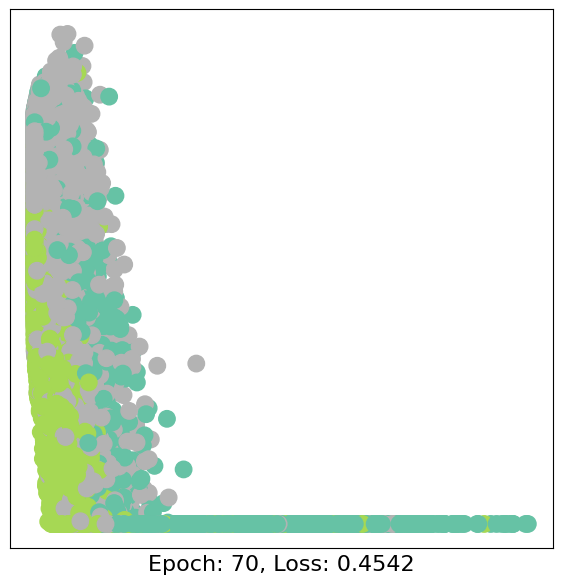

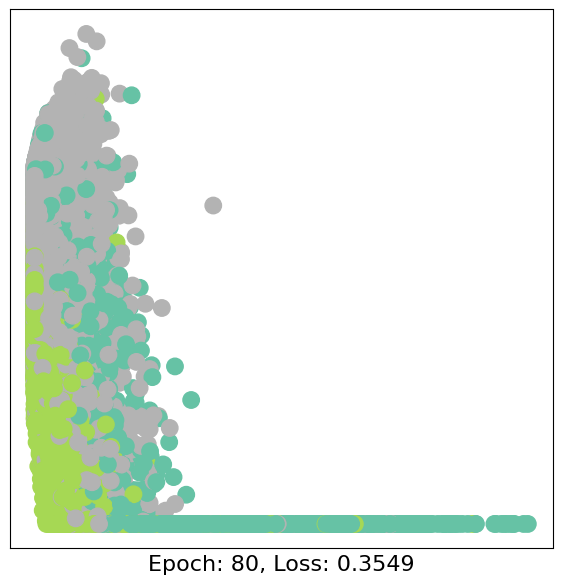

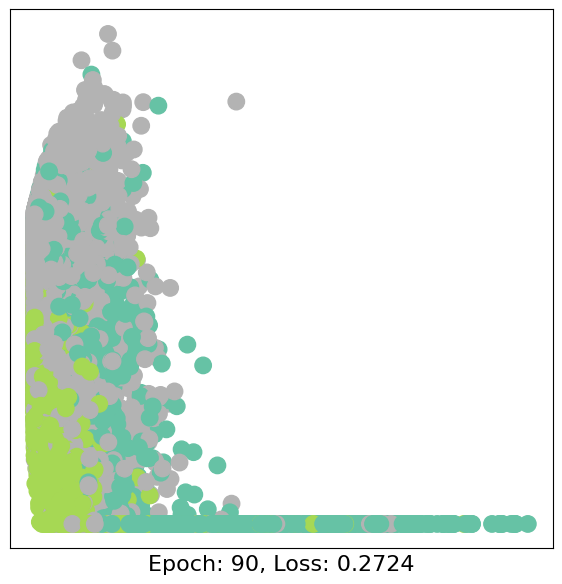

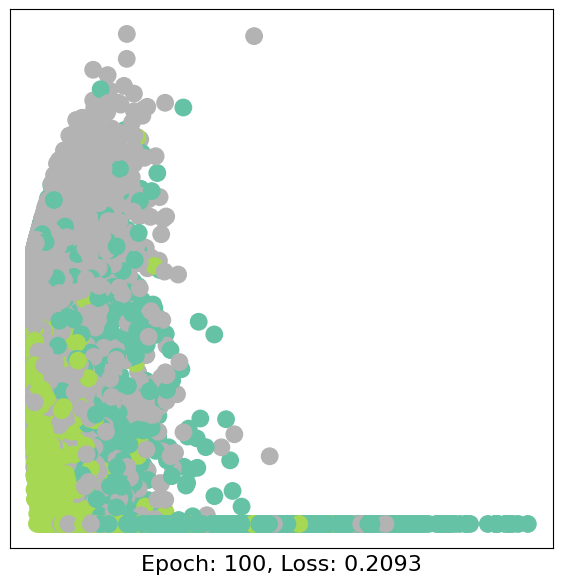

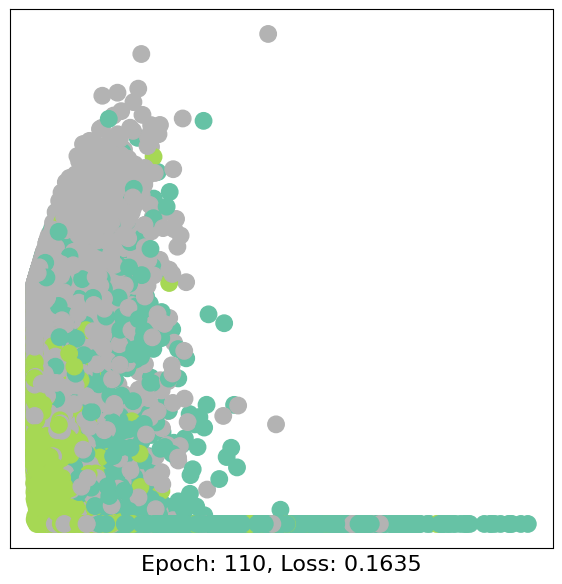

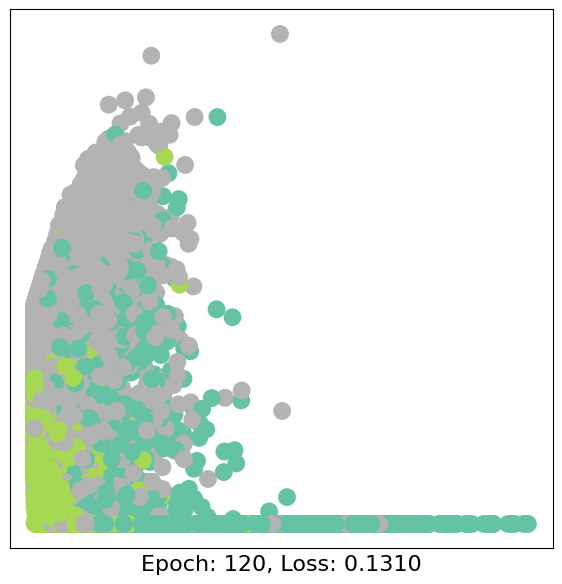

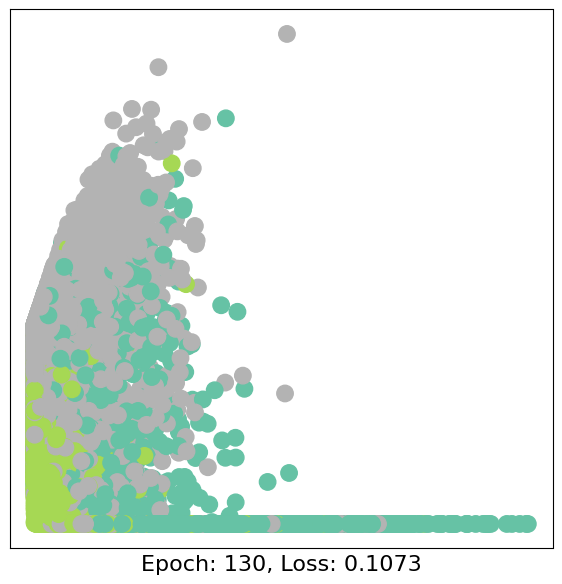

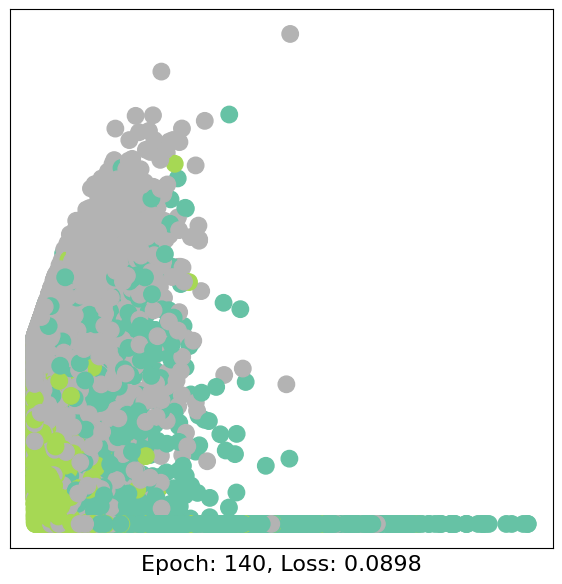

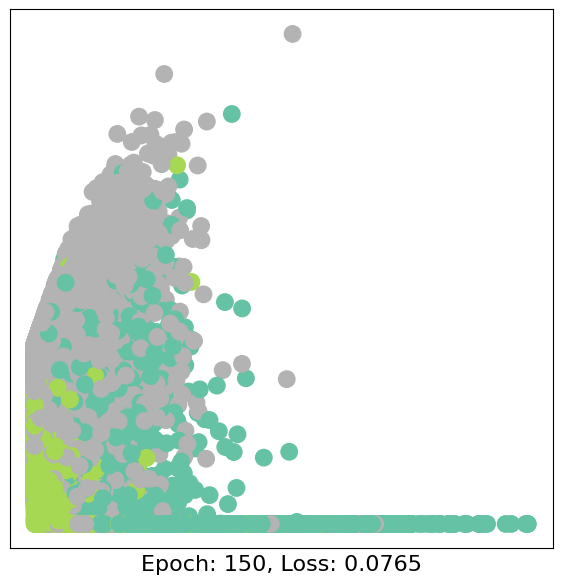

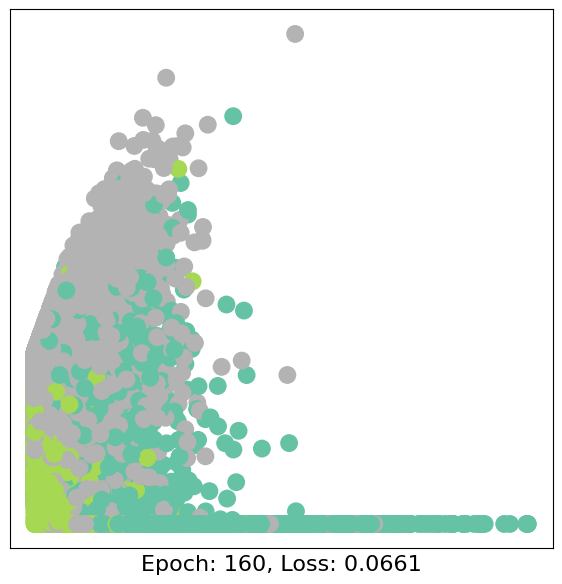

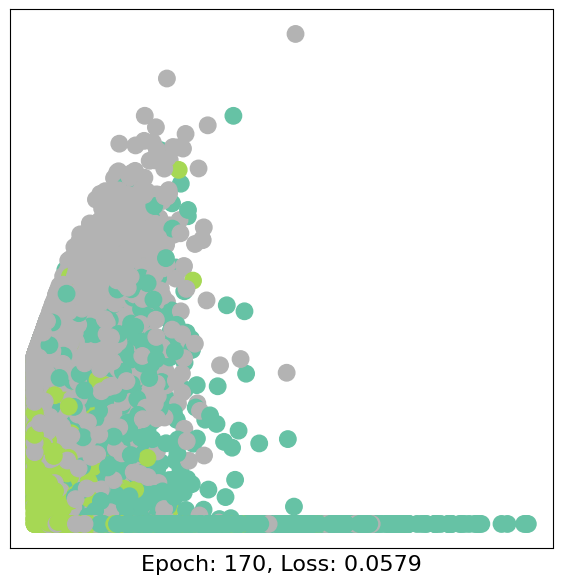

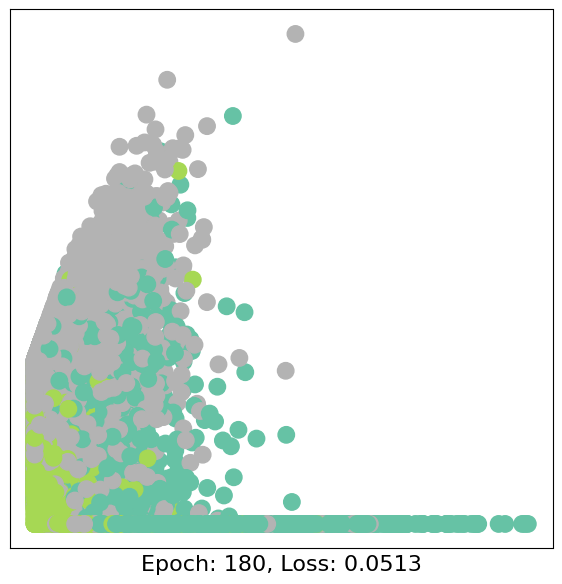

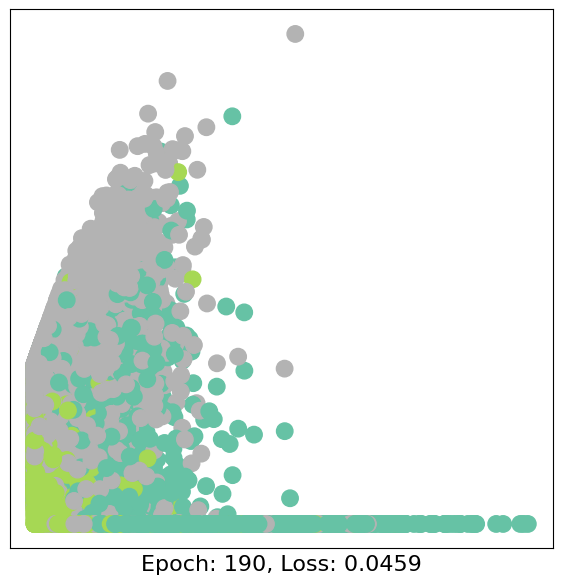

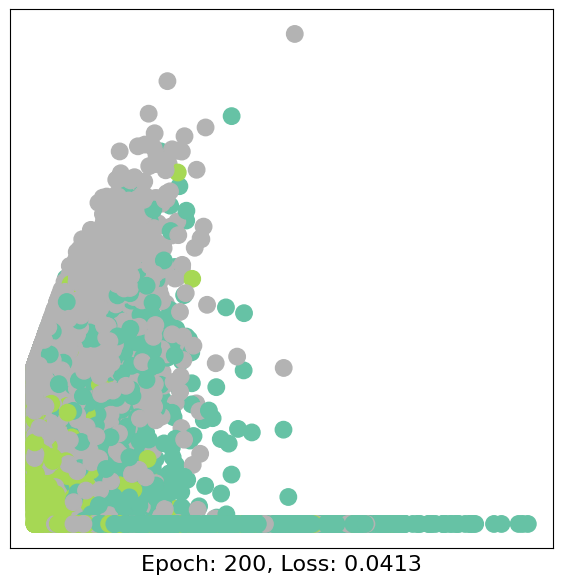

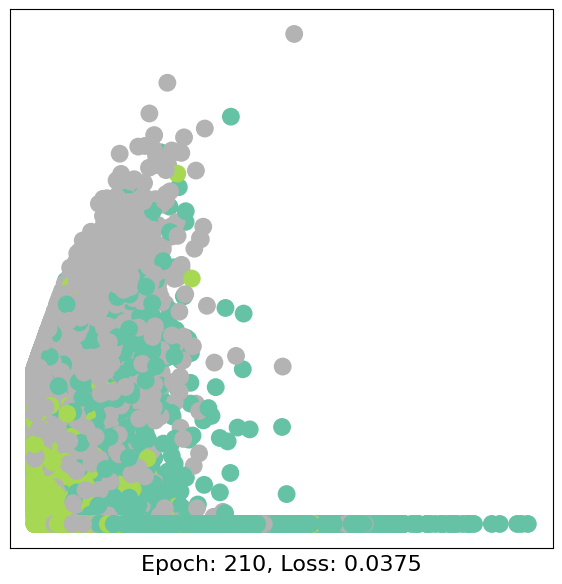

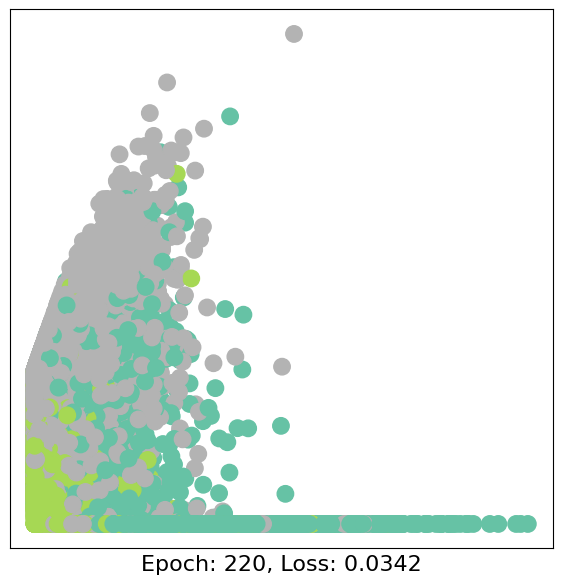

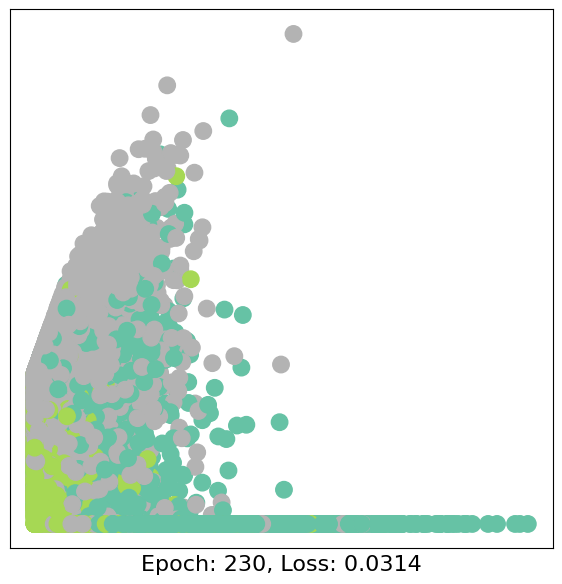

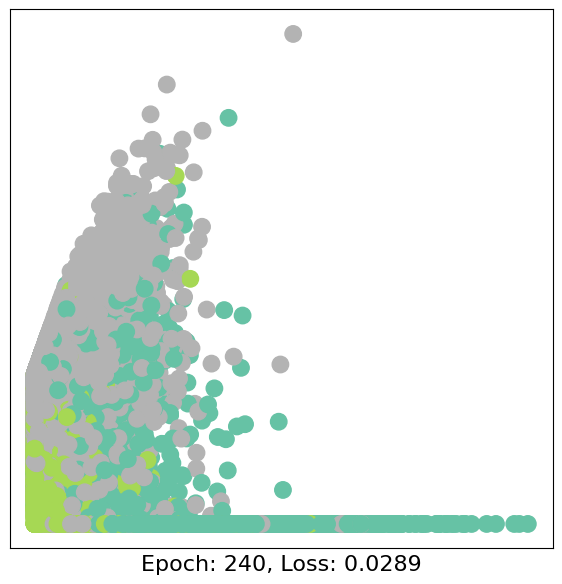

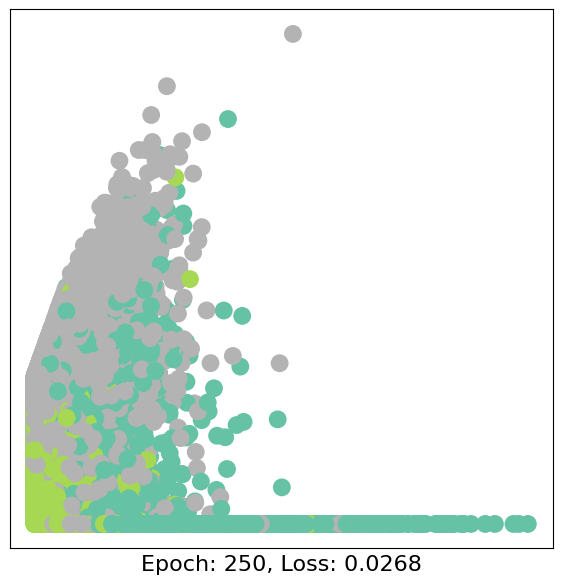

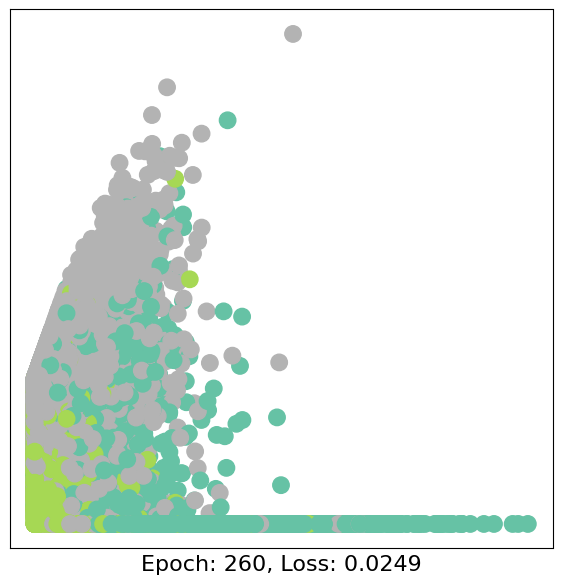

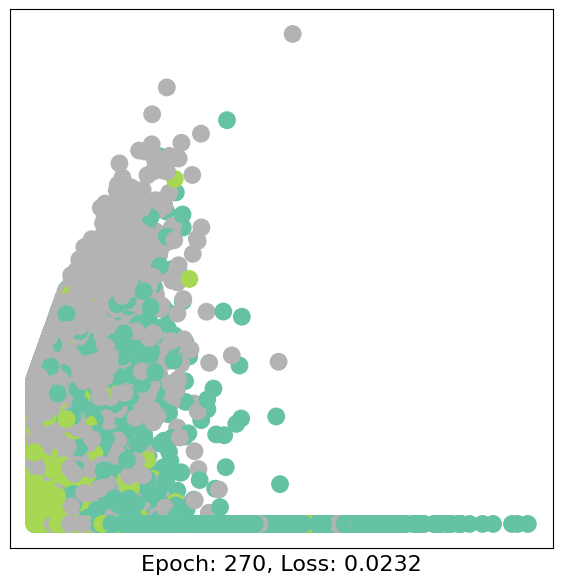

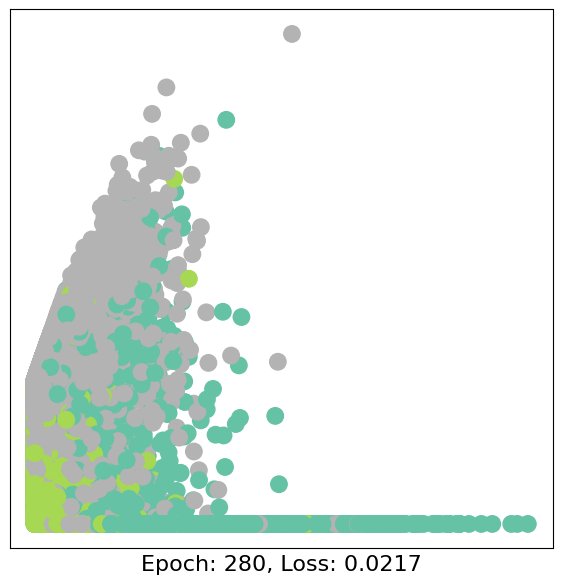

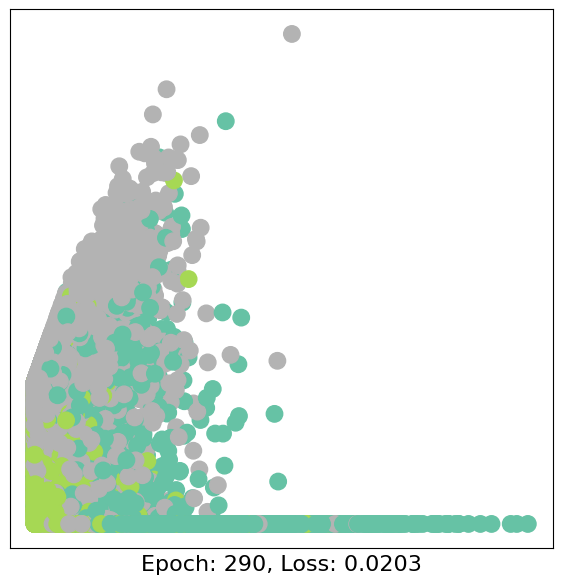

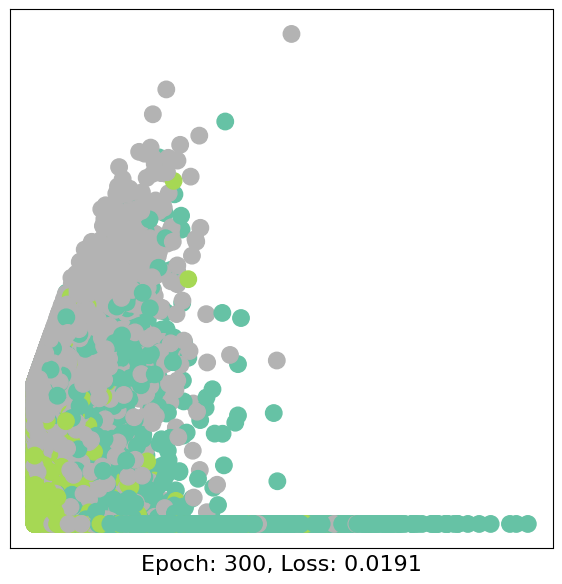

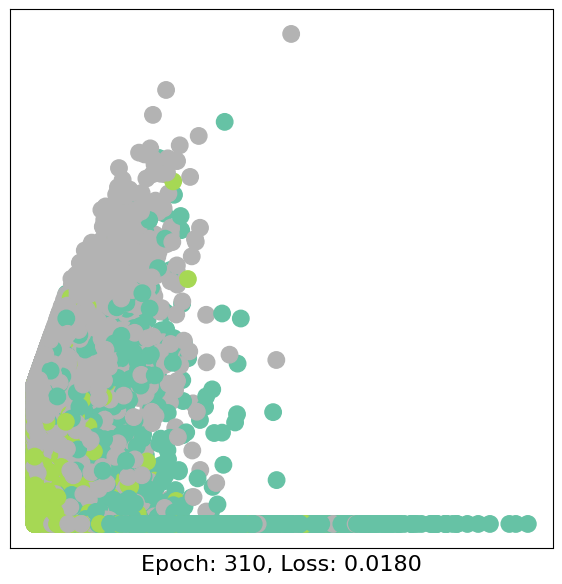

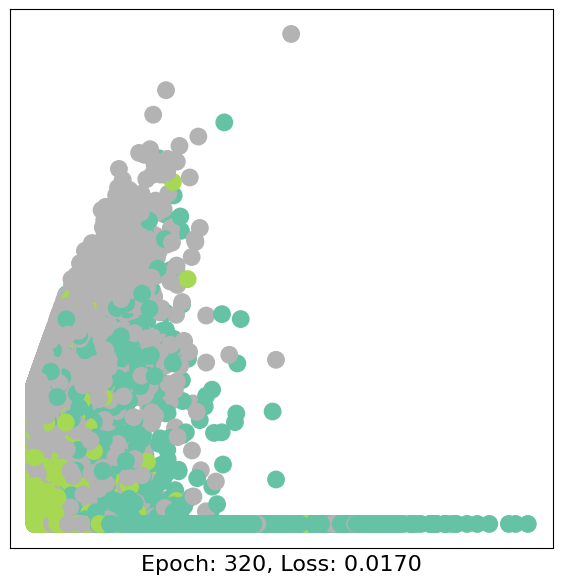

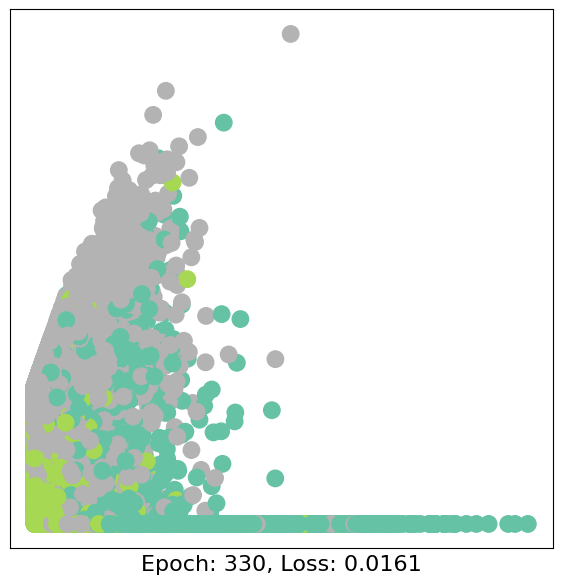

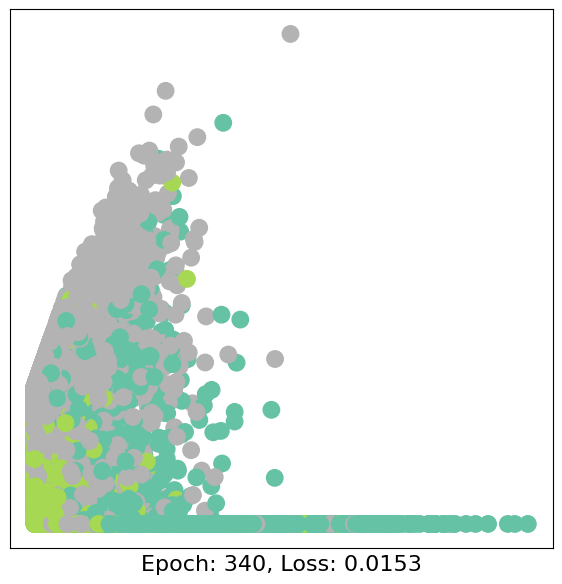

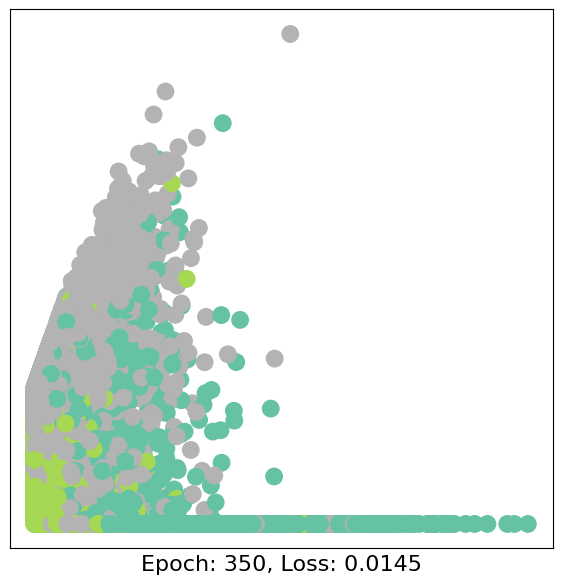

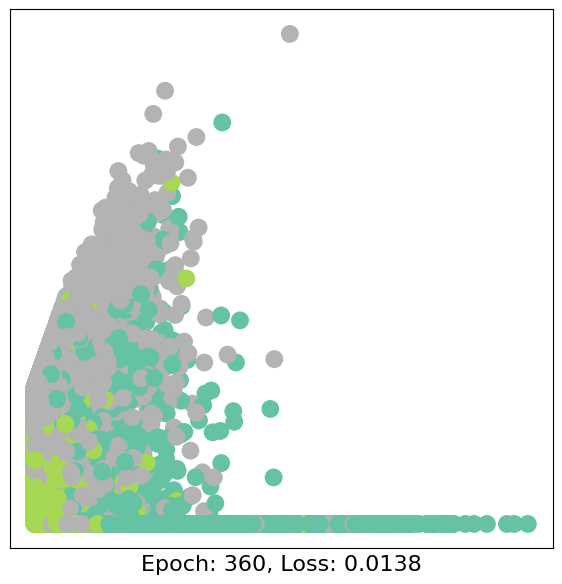

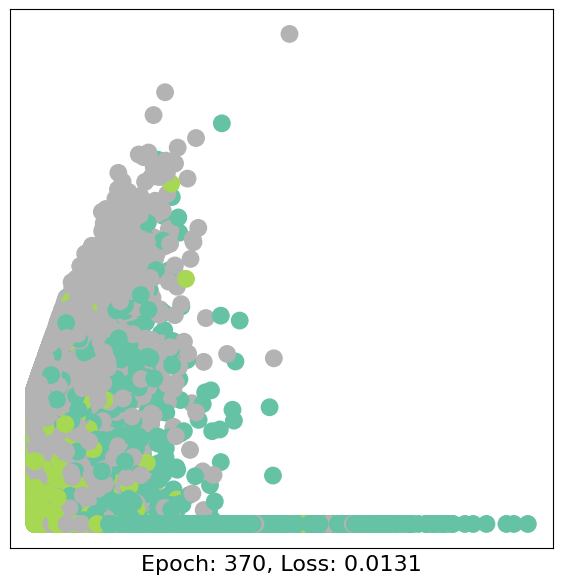

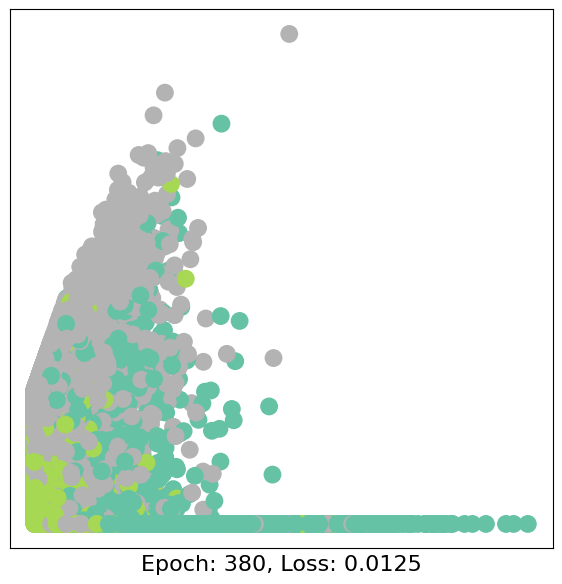

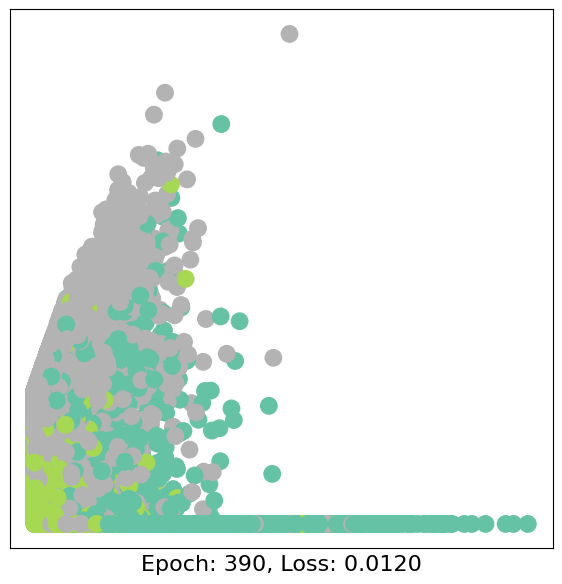

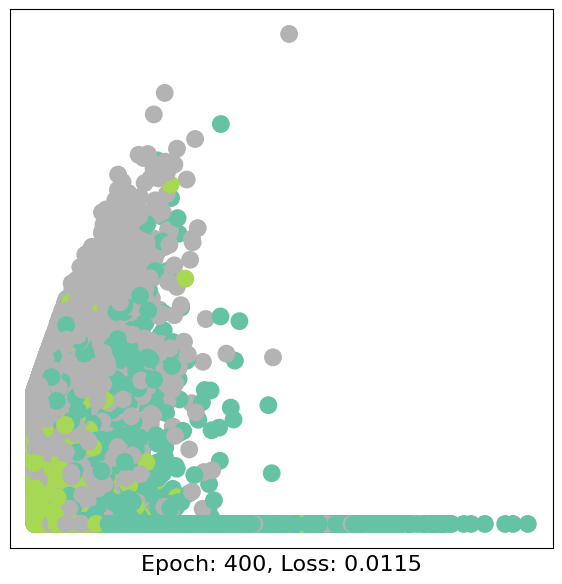

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion. (explain entropy loss)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes. (Page 5 info)
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

@torch.no_grad()
def test(data):
    model.eval()
    log_probs, h = model(data.x, data.edge_index)
    accs = []
    for _, mask in data('train_mask', 'test_mask'):
        pred = log_probs[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs


for epoch in range(401):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

test(data)

# References:
Hamilton, W. (2020). *Graph Representation Learning. McGill University*. https://www.cs.mcgill.ca/~wlh/grl_book/files/GRL_Book.pdf

WelcomeAIOverlords. (2020)  *Intro to Graphs and Label Propagation Algorithm in Machine Learning. Youtube*. [Youtube Video]. https://www.youtube.com/watch?v=OI0Jo-5d190

WelcomeAIOverlords. (2020)  *Graph Convolutional Networks (GCNs) made simple*. [Youtube Video]. https://www.youtube.com/watch?v=2KRAOZIULzw

Veličković, P. (Januray 9, 2023). *Everything is Connected: Graph Neural Networks. Cornell University*. https://arxiv.org/abs/2301.08210

Anirudh. (2016, July 28). Implementing undirected graphs in Python. Discovering Python & R. https://pythonandr.com/2016/07/28/implementing-undirected-graphs-in-python/

Computer representation of graphs. Graphs and Trees. (n.d.). https://www.cs.mtsu.edu/~xyang/3080/adjacencyMatrix.html

Hugh, G. (2022, January 18). Illegal bitcoin transactions? not on graph ML’s watch! Medium. https://medium.com/stanford-cs224w/illegal-bitcoin-transactions-not-on-graph-mls-watch-23a76c6c5b98

Opidi, A. (2024, August 7). Pytorch loss functions: The ultimate guide. neptune.ai. https://neptune.ai/blog/pytorch-loss-functions

Crossentropyloss. CrossEntropyLoss - PyTorch 2.4 documentation. (n.d.). https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

Adam. Adam - PyTorch 2.4 documentation. (n.d.). https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam

Hoppa, J. (2019, April 8). Graph algorithms in neo4j: Label Propagation. Graph Database & Analytics. https://neo4j.com/blog/graph-algorithms-neo4j-label-propagation/

Computer representation of graphs. Graphs and Trees. (n.d.-a). https://www.cs.mtsu.edu/~xyang/3080/adjacencyMatrix.html
